In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [3]:
%load_ext autoreload
%autoreload 2
from glob import glob 
from MLConstructionExperiment import *

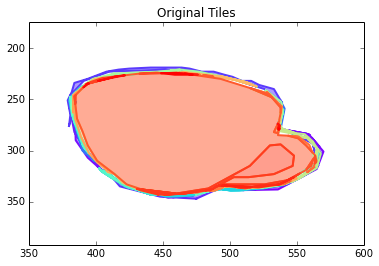

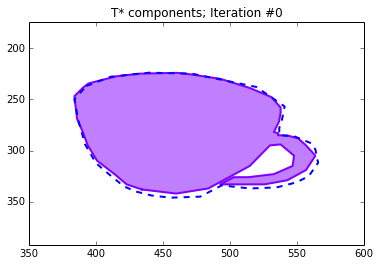

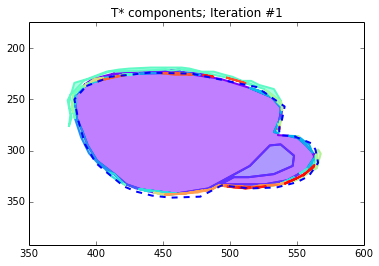

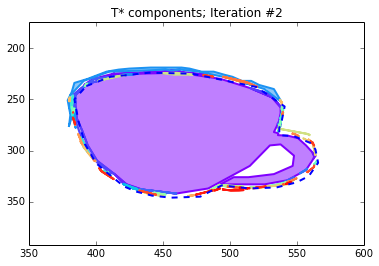

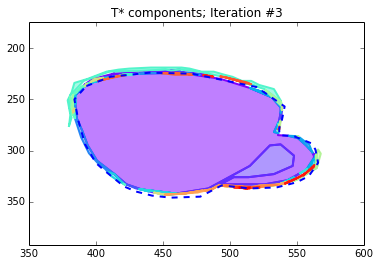

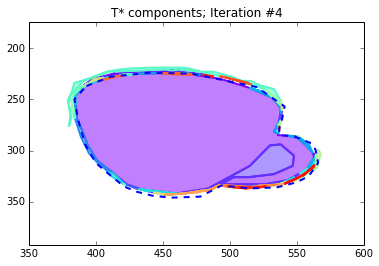

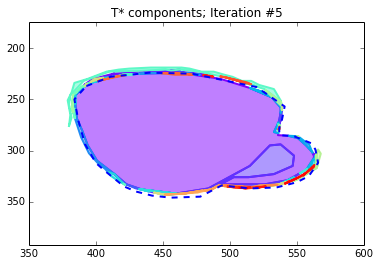

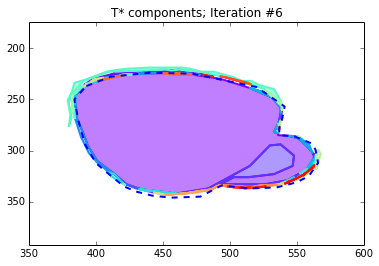

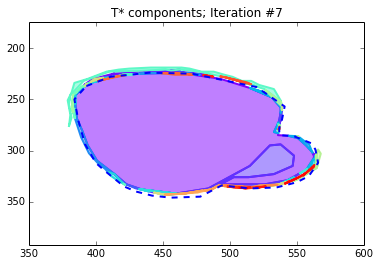

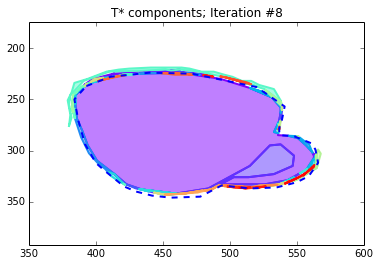

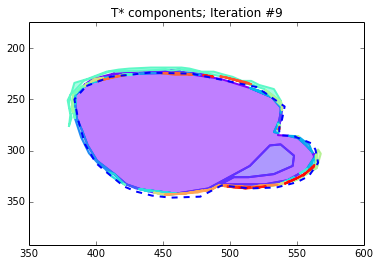

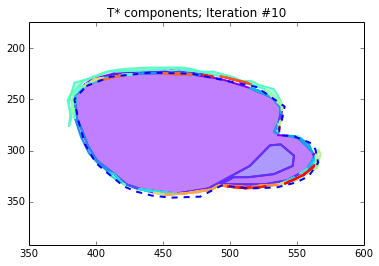

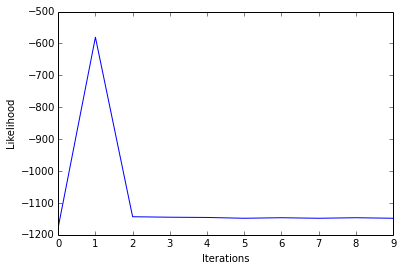

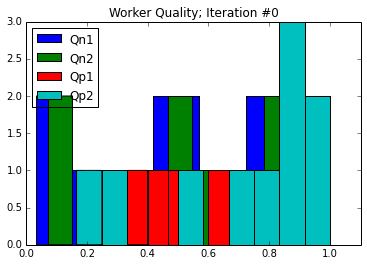

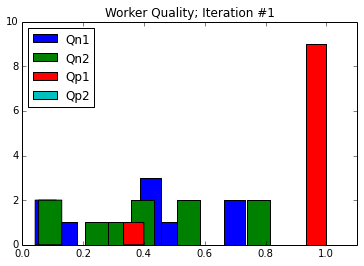

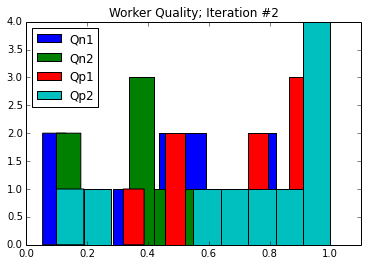

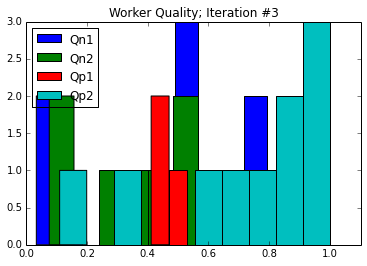

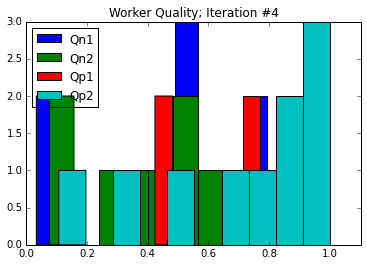

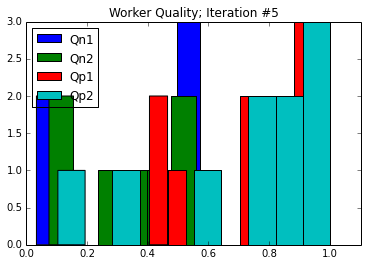

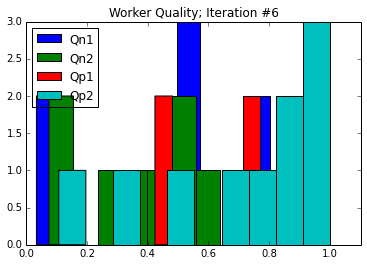

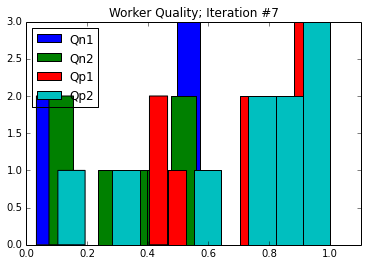

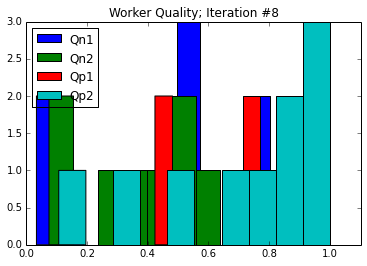

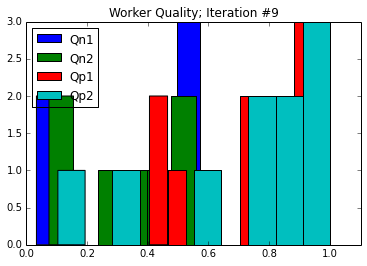

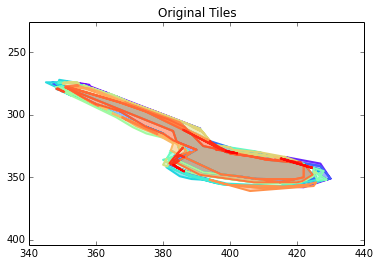

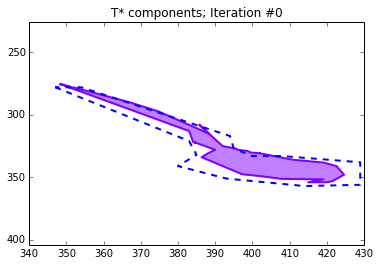

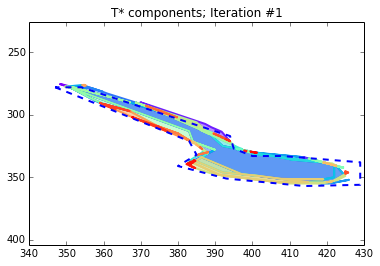

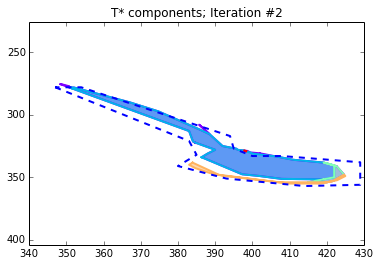

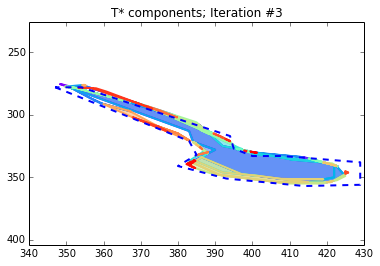

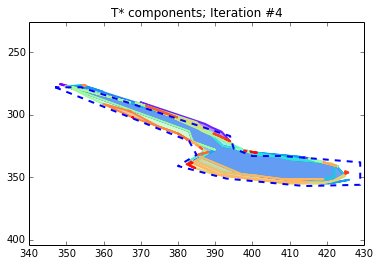

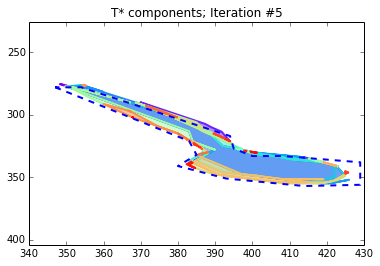

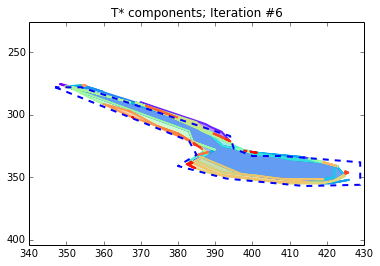

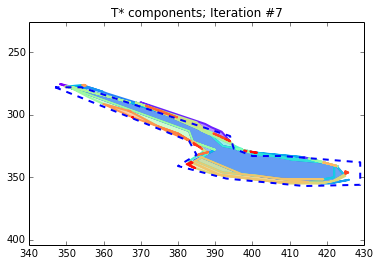

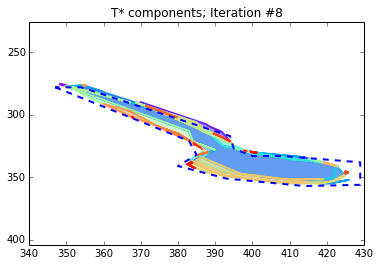

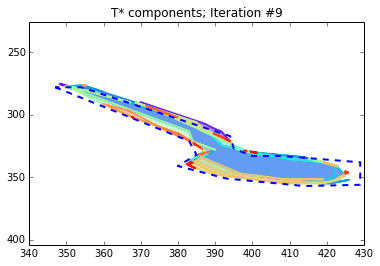

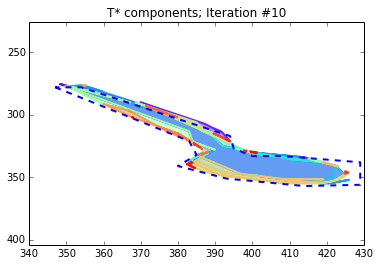

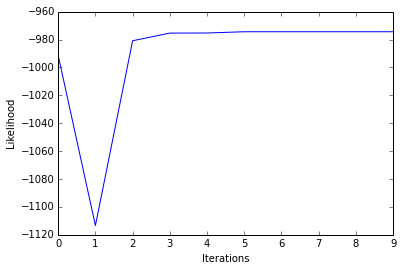

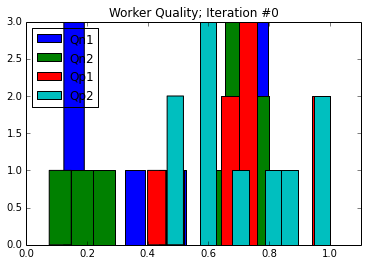

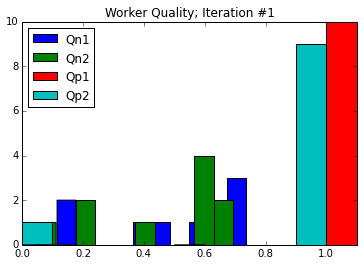

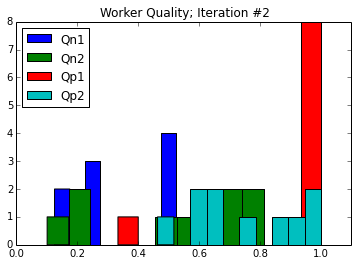

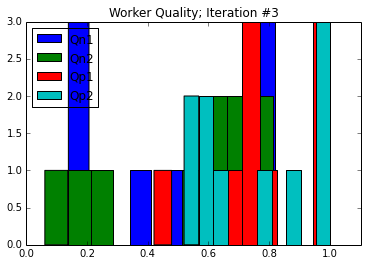

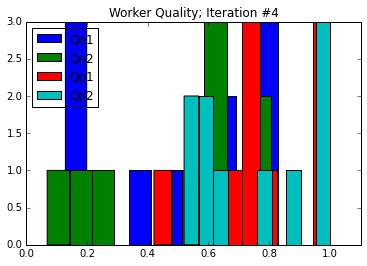

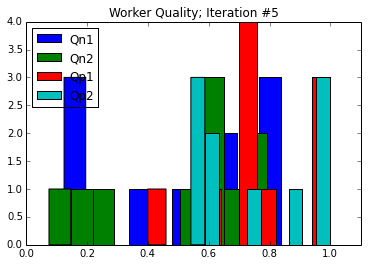

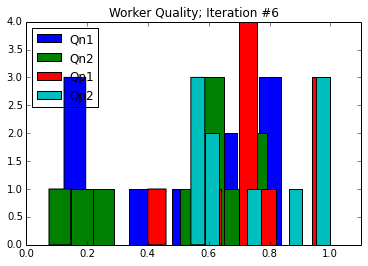

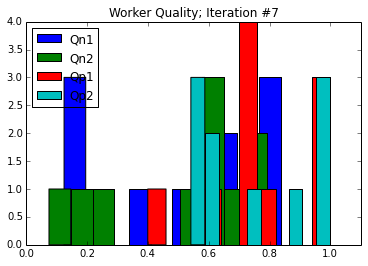

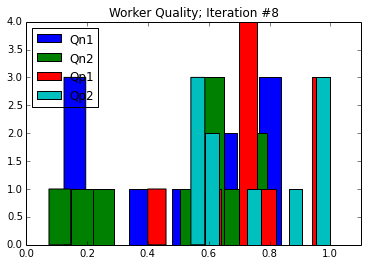

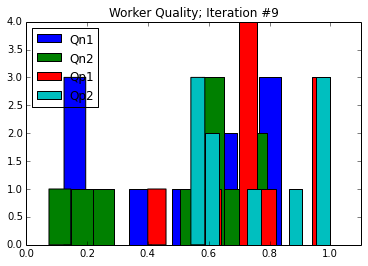

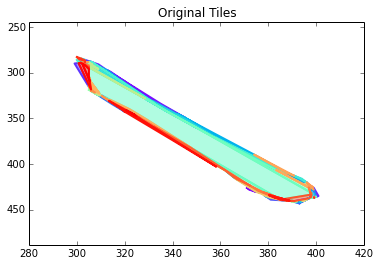

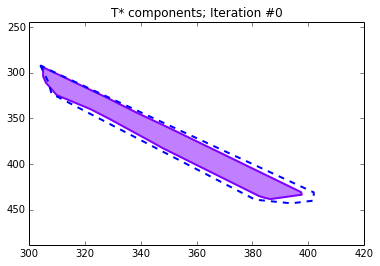

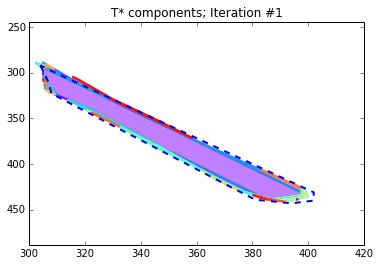

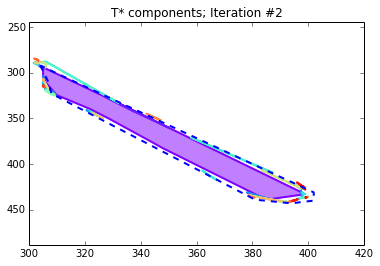

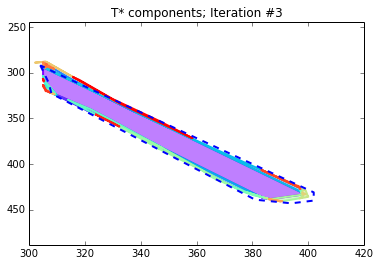

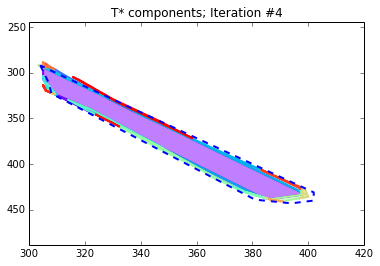

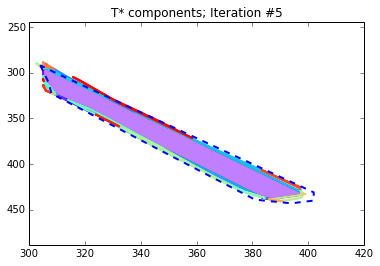

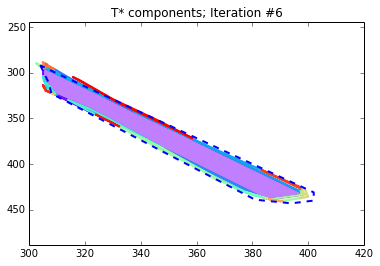

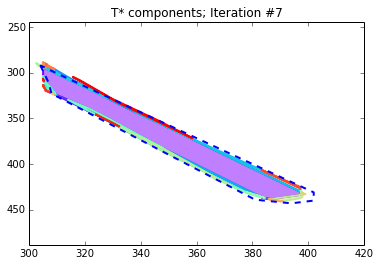

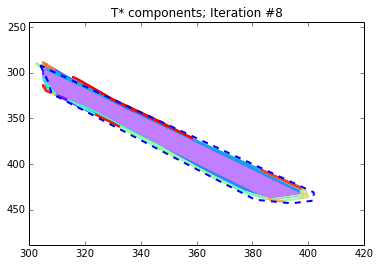

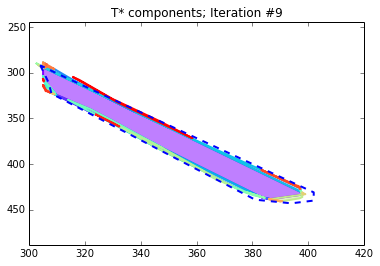

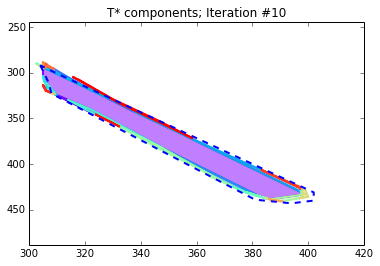

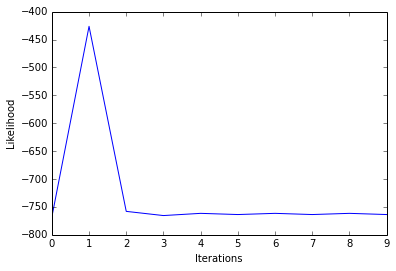

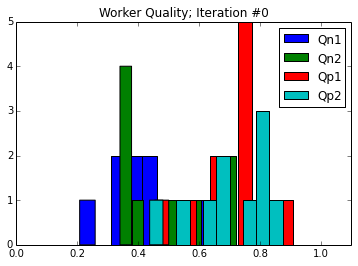

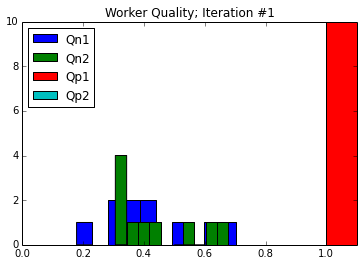

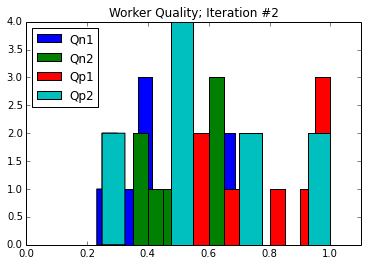

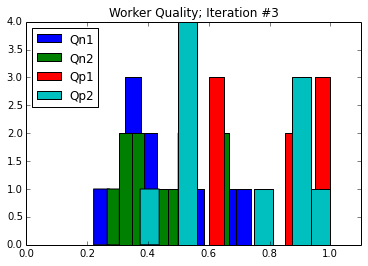

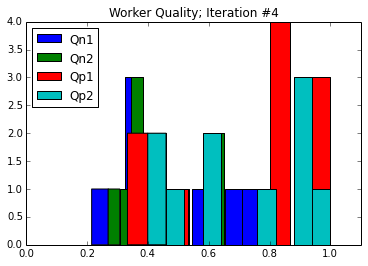

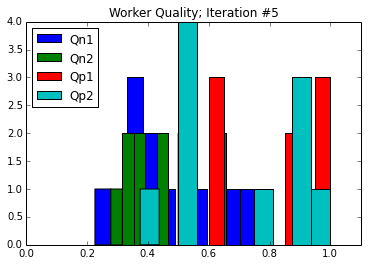

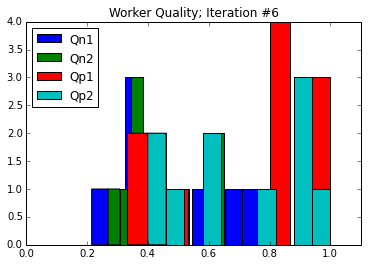

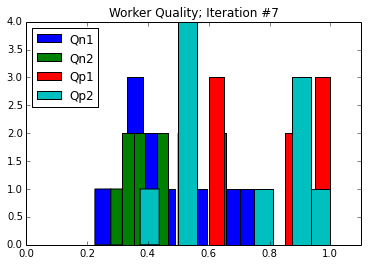

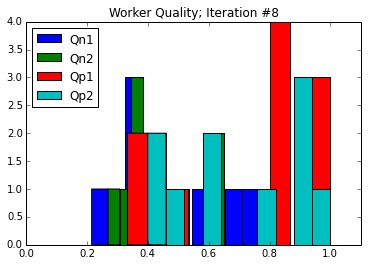

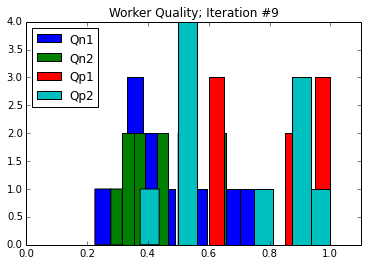

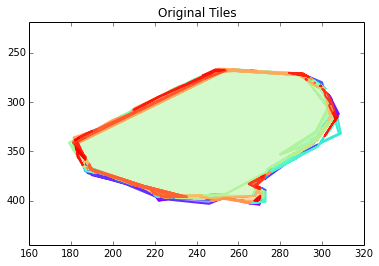

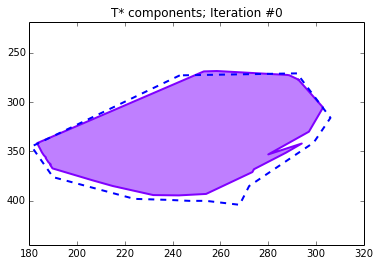

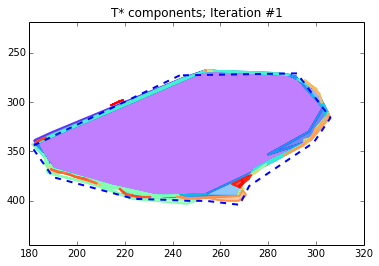

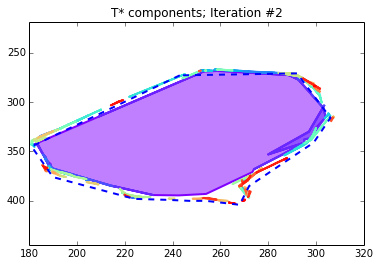

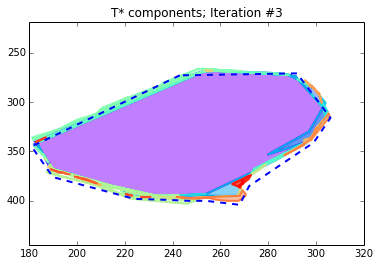

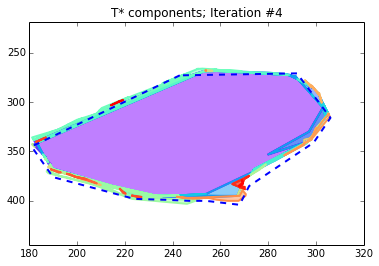

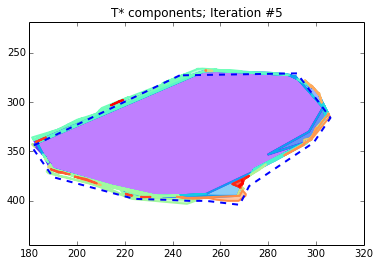

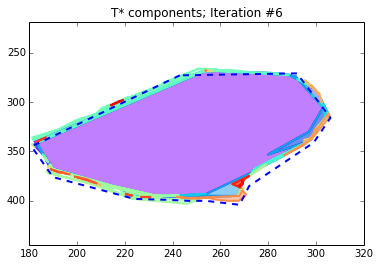

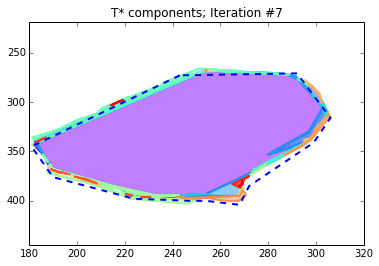

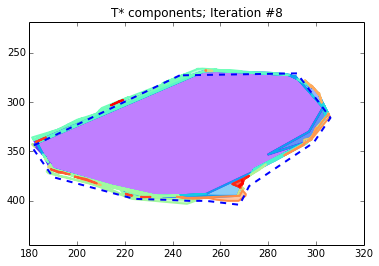

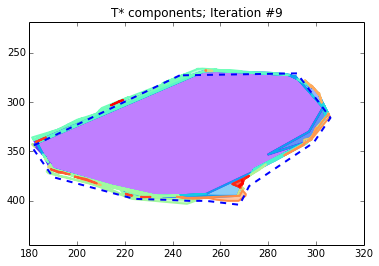

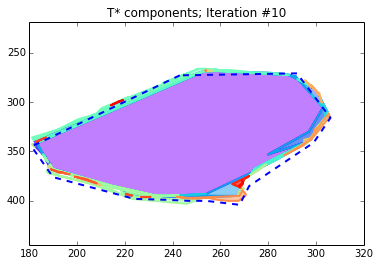

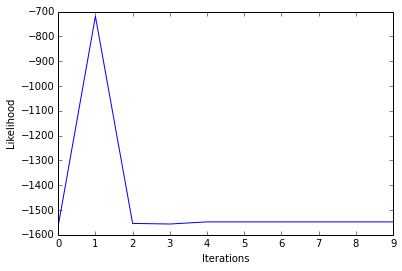

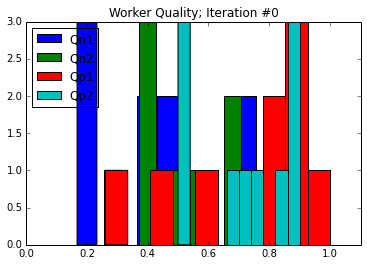

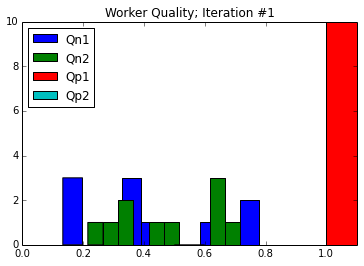

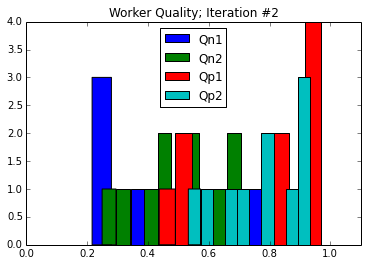

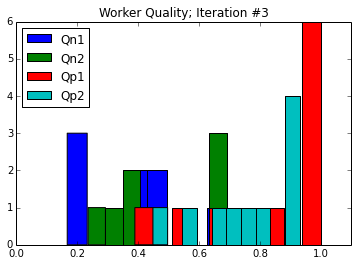

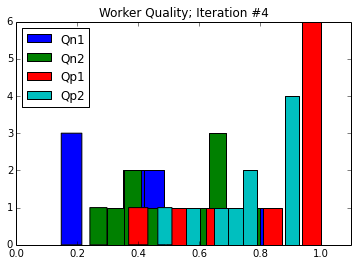

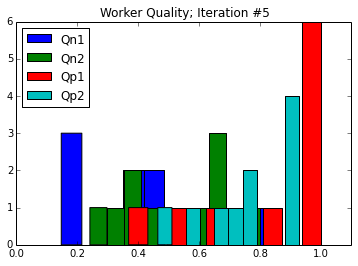

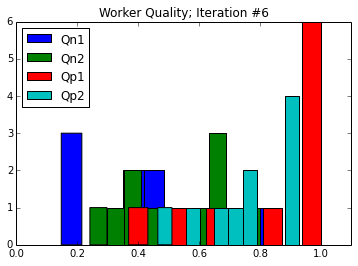

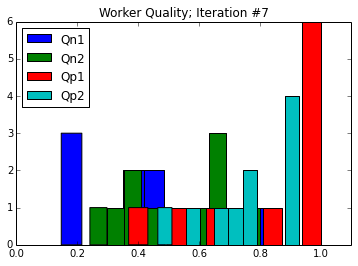

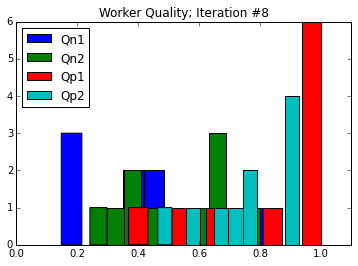

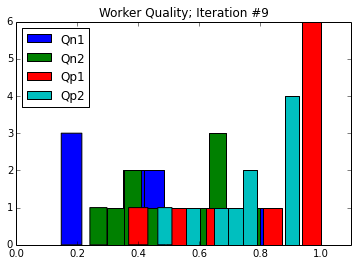

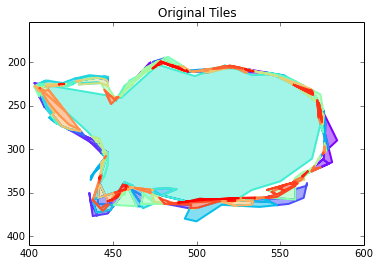

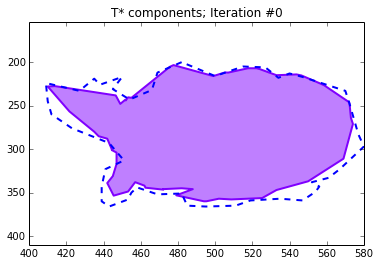

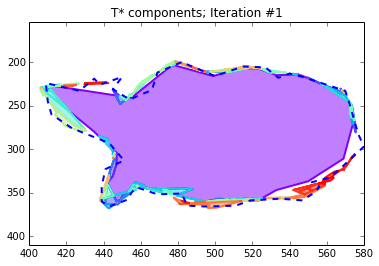

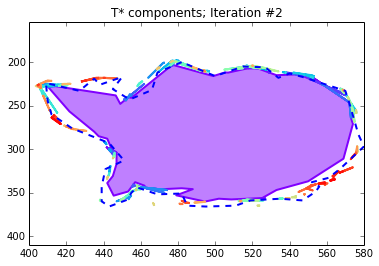

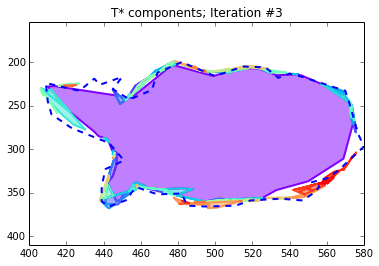

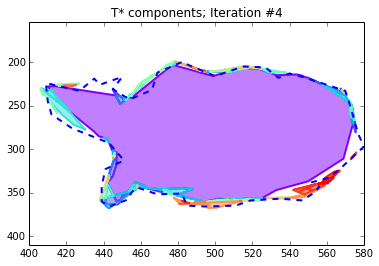

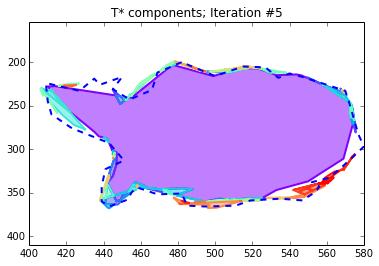

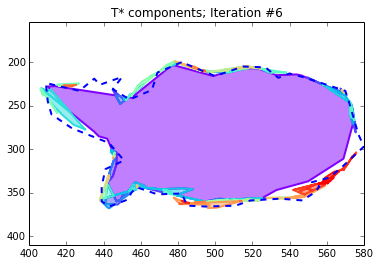

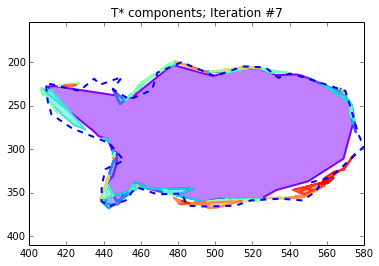

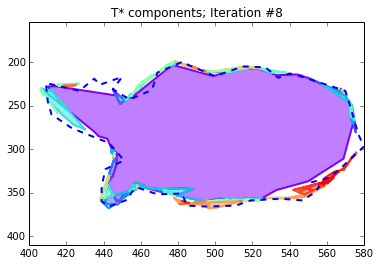

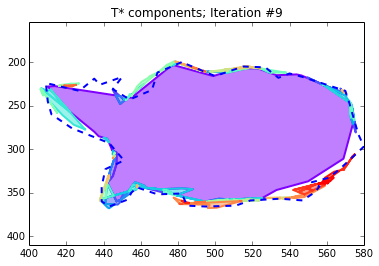

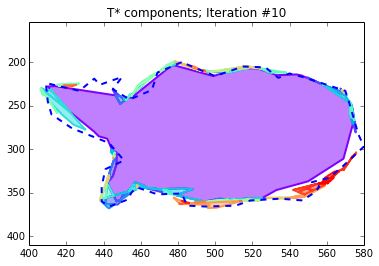

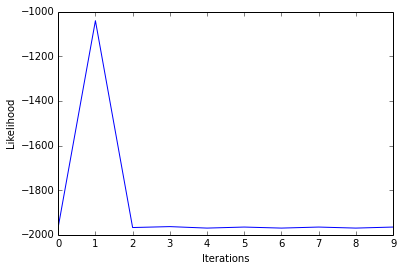

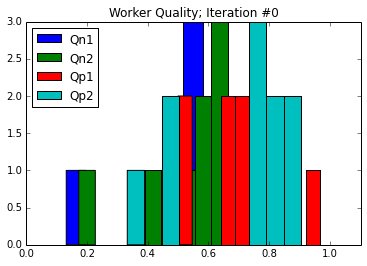

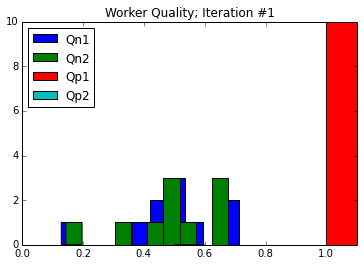

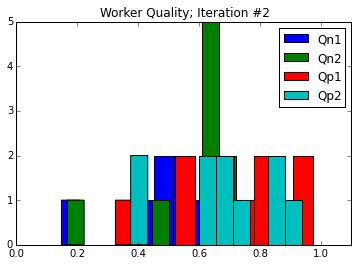

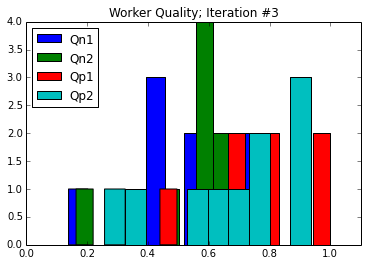

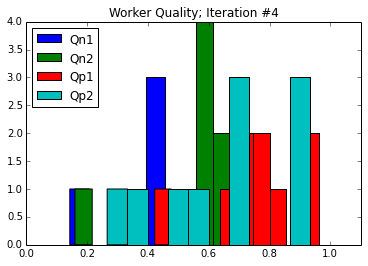

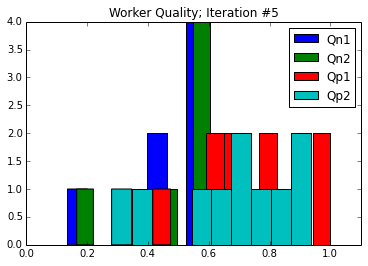

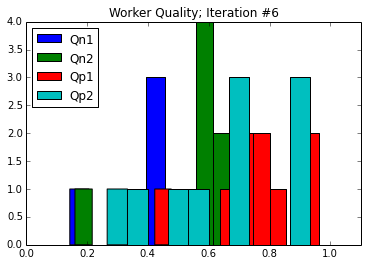

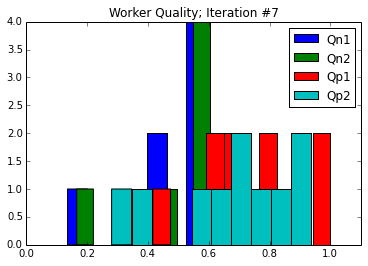

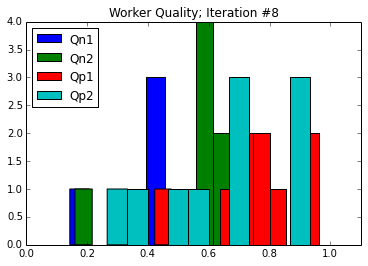

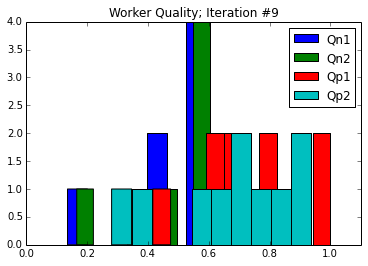

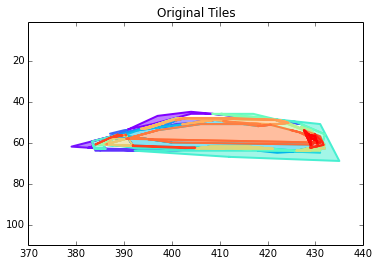

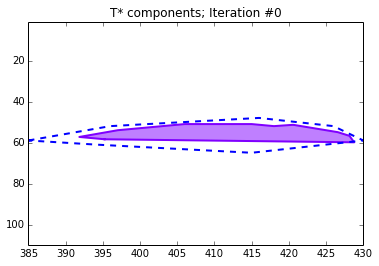

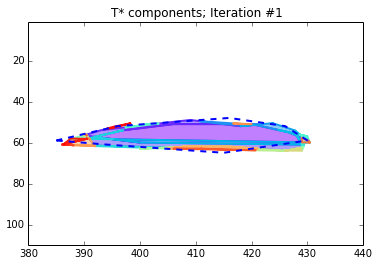

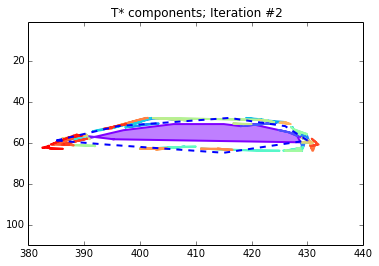

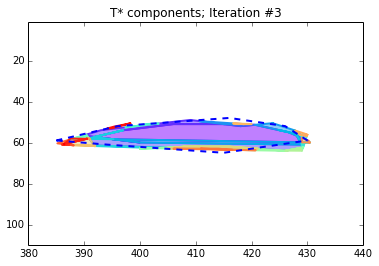

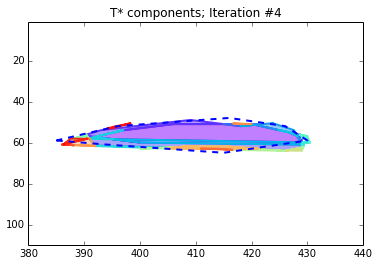

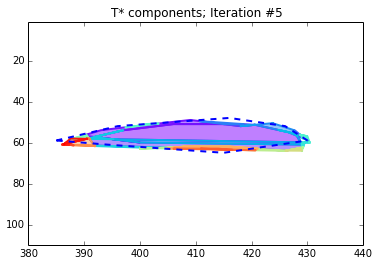

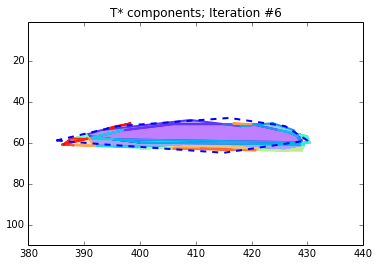

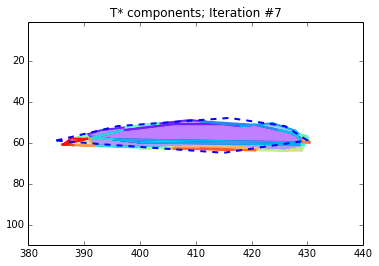

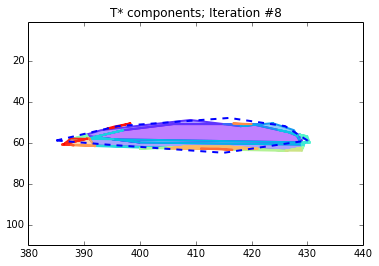

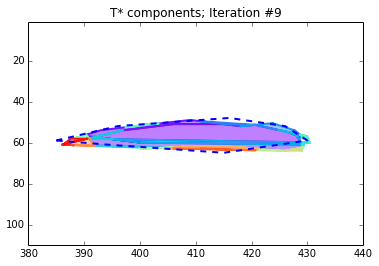

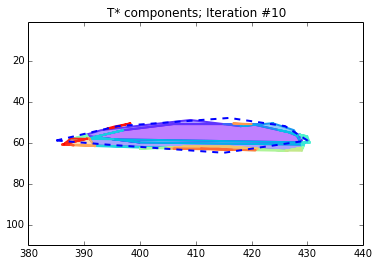

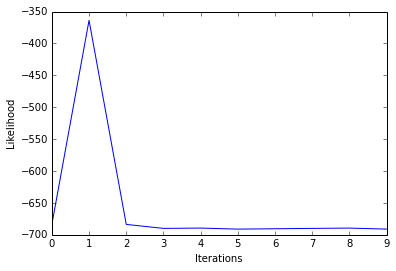

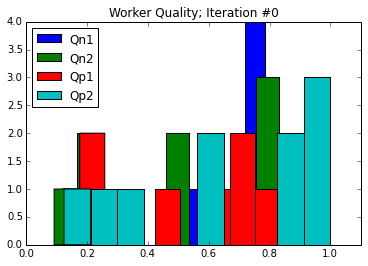

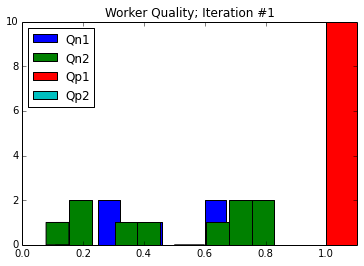

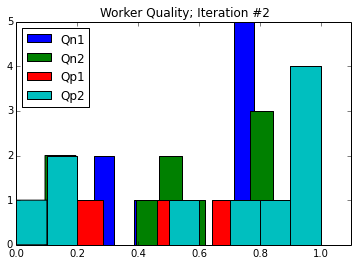

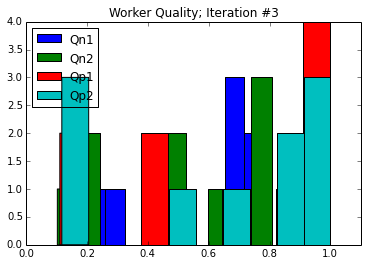

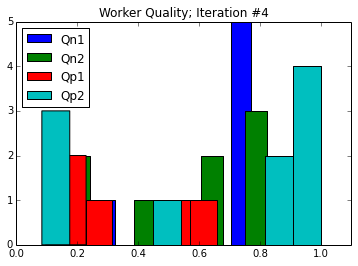

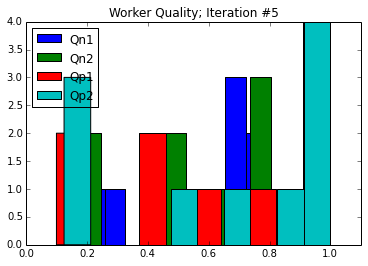

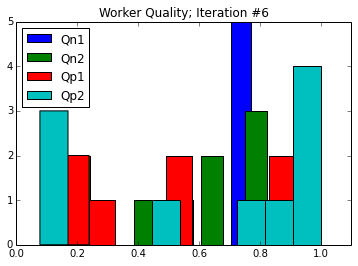

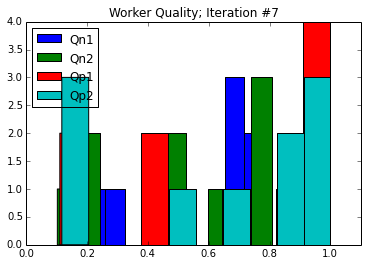

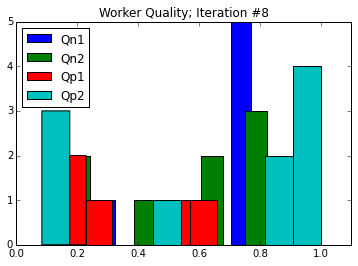

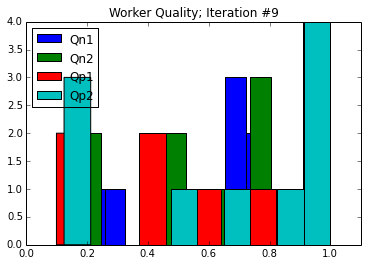

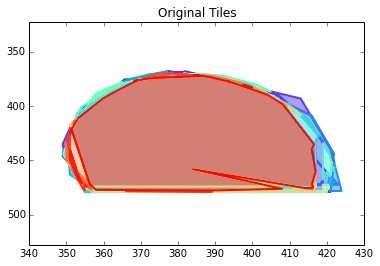

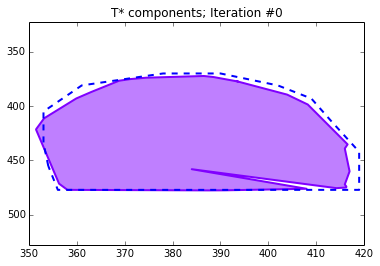

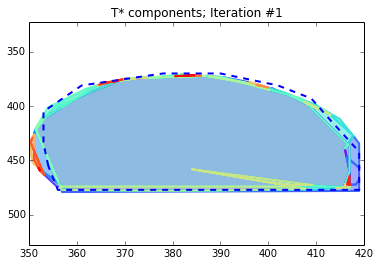

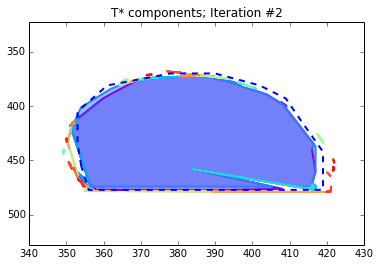

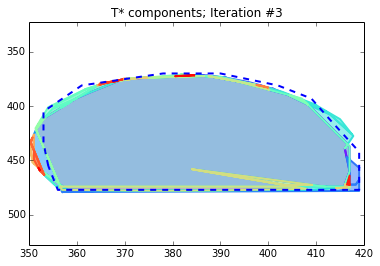

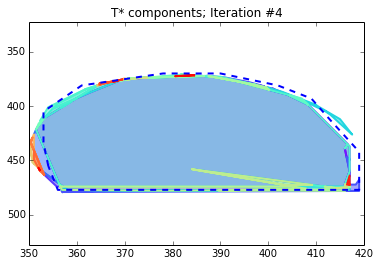

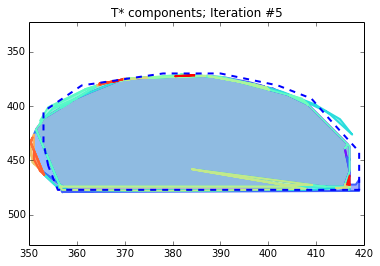

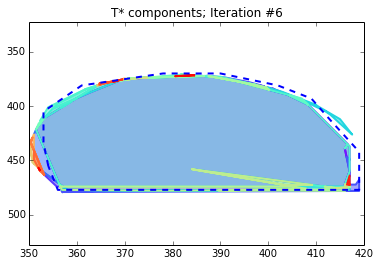

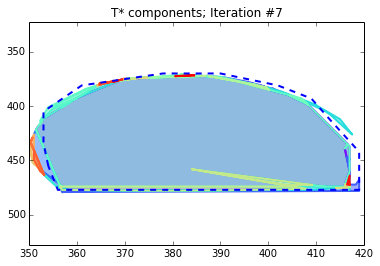

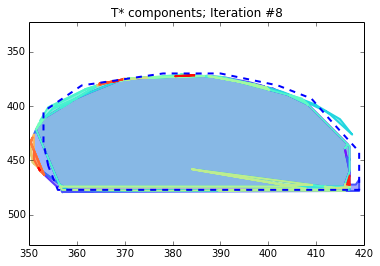

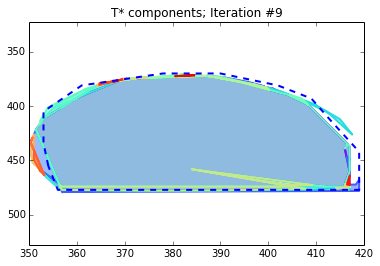

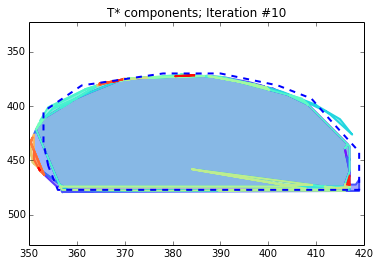

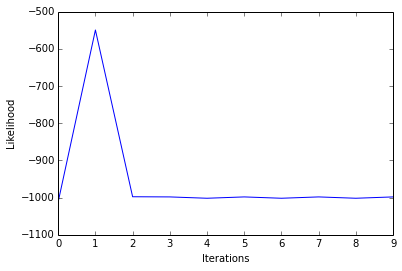

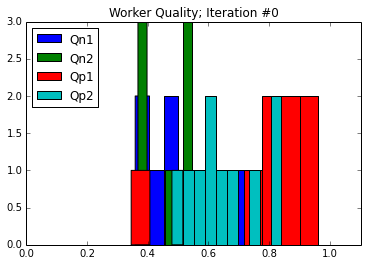

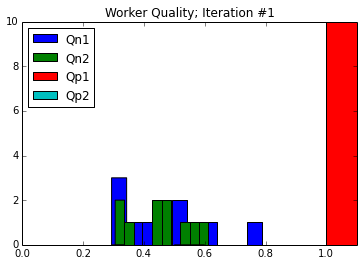

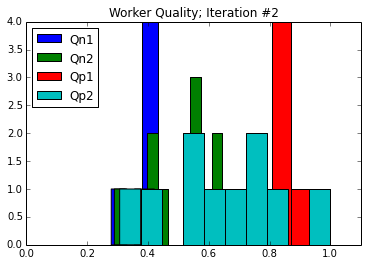

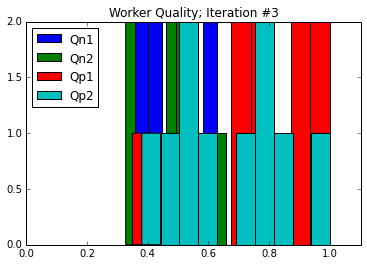

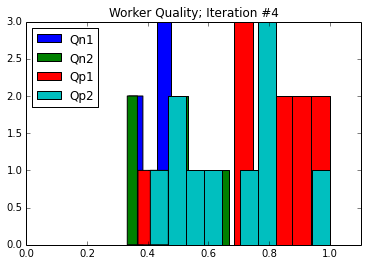

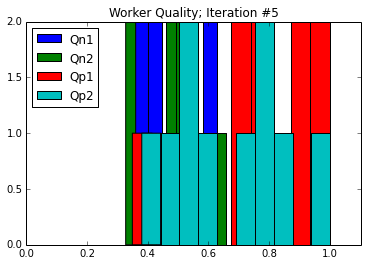

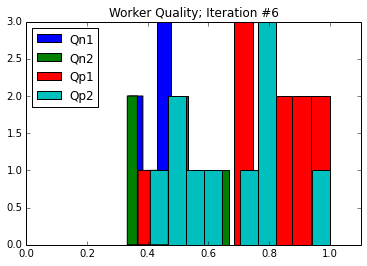

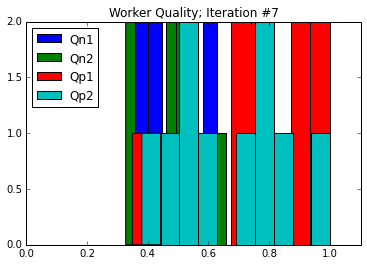

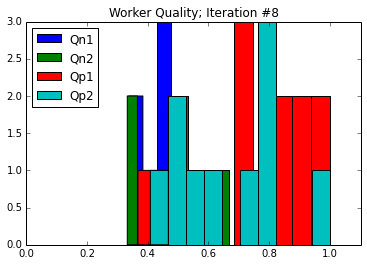

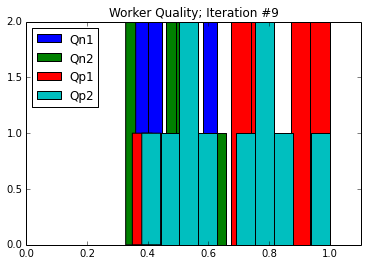

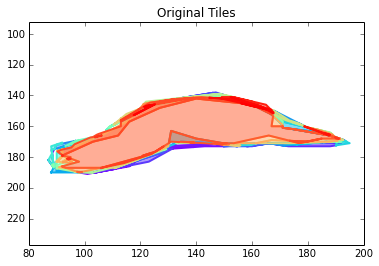

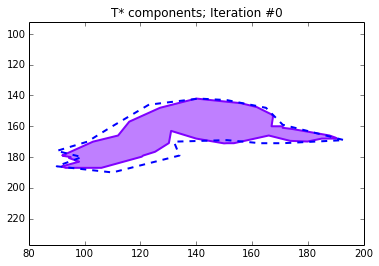

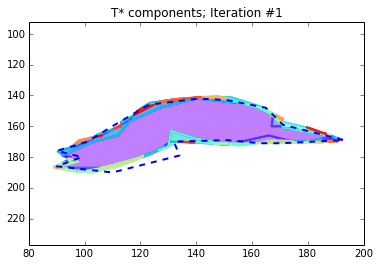

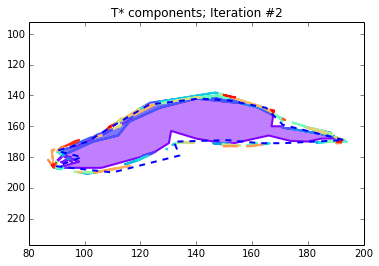

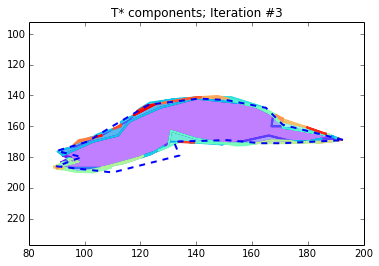

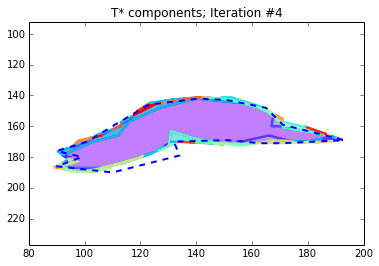

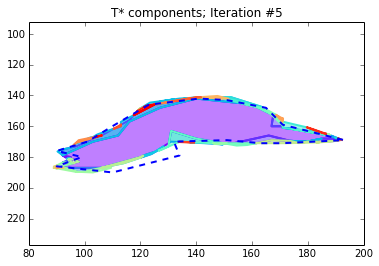

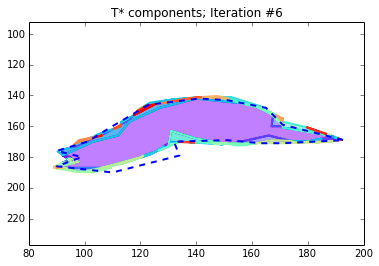

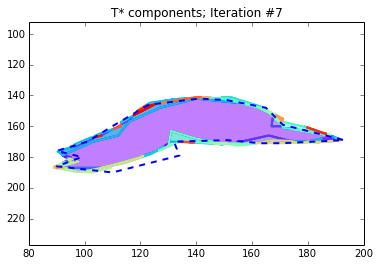

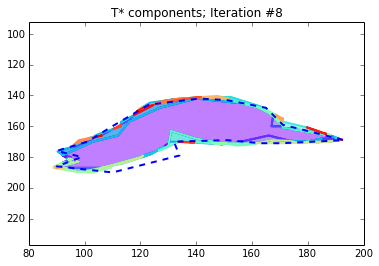

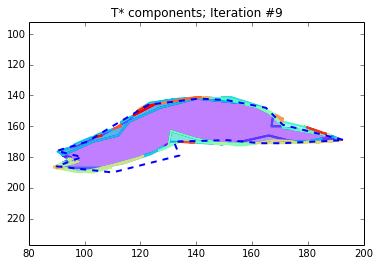

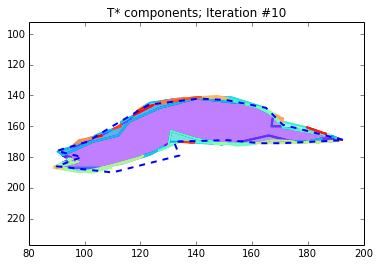

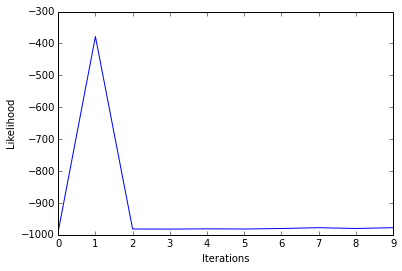

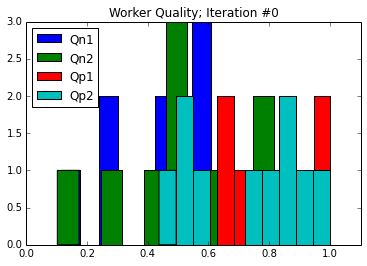

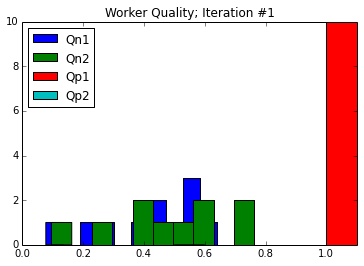

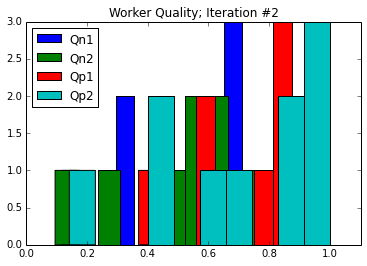

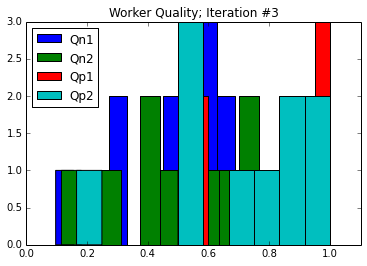

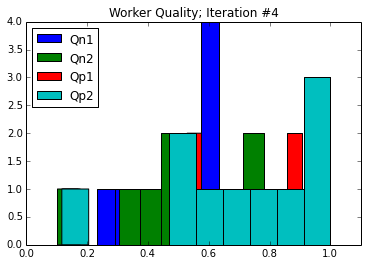

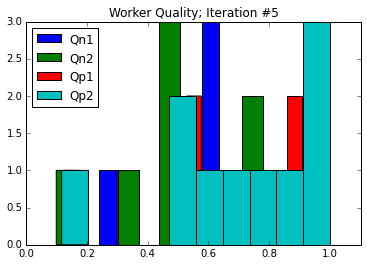

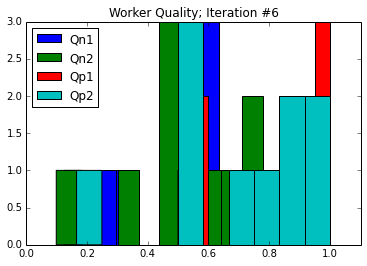

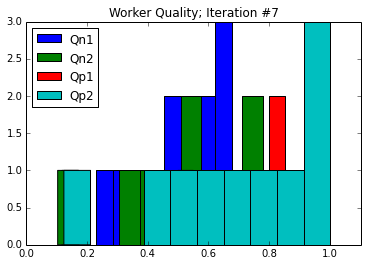

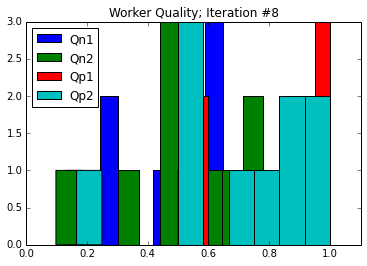

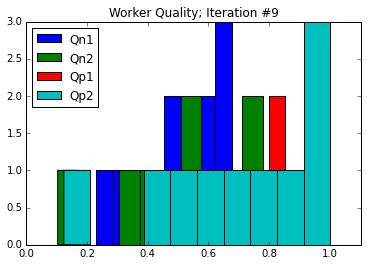

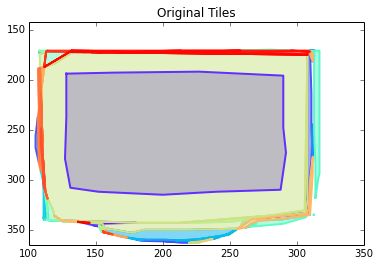

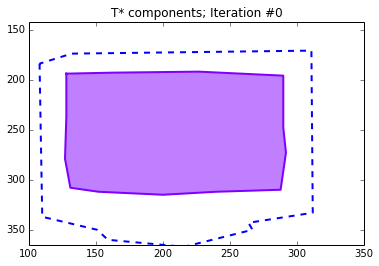

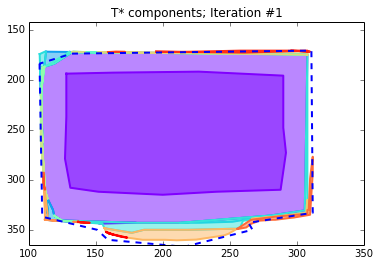

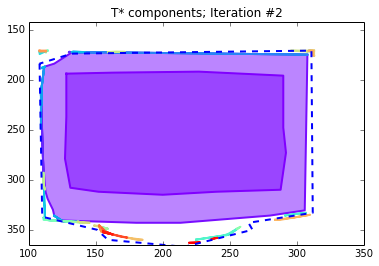

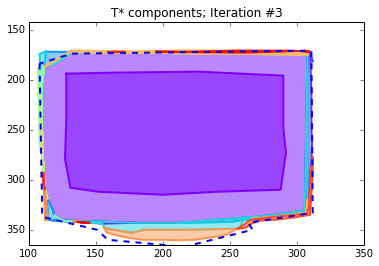

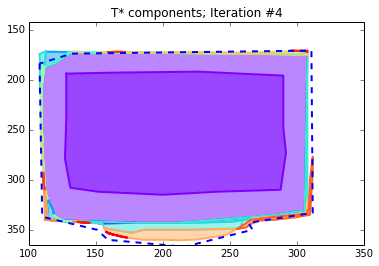

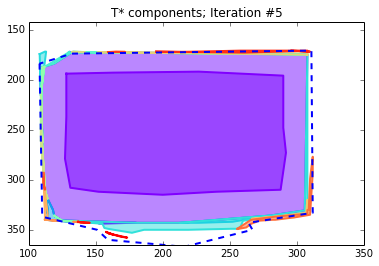

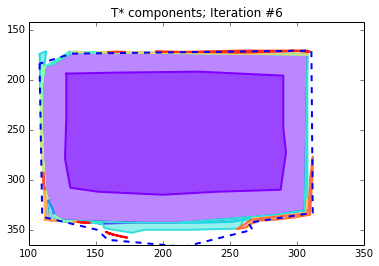

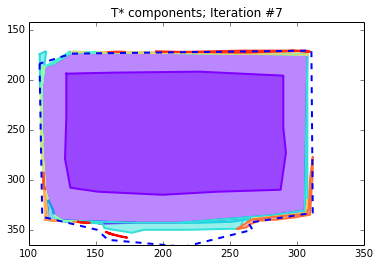

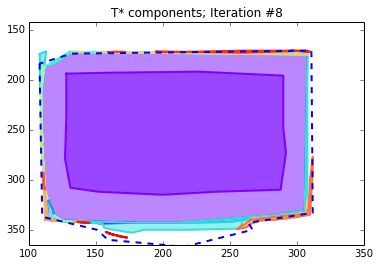

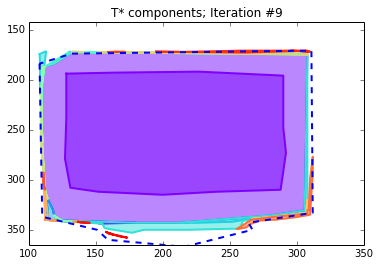

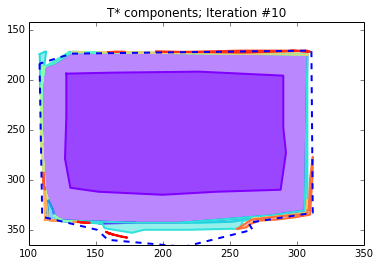

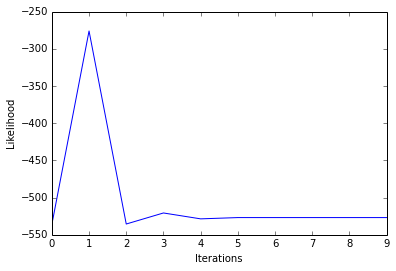

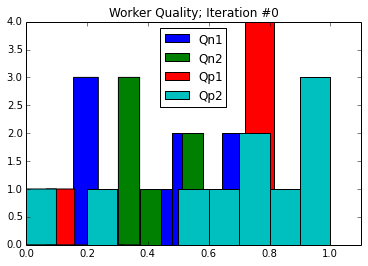

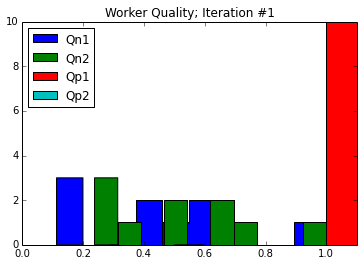

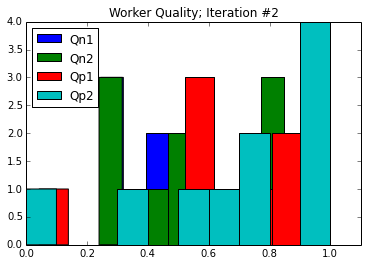

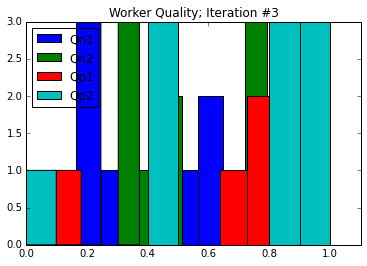

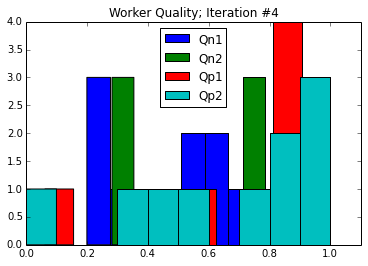

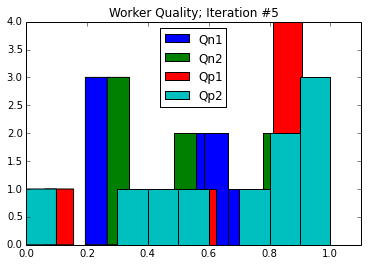

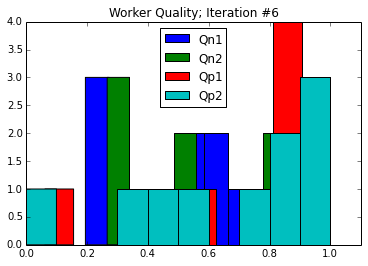

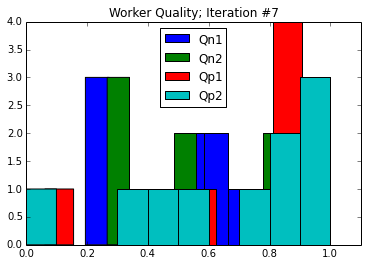

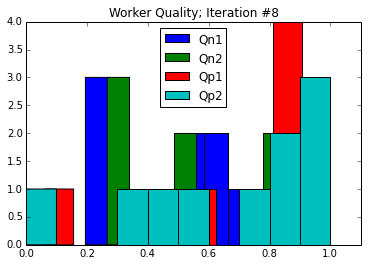

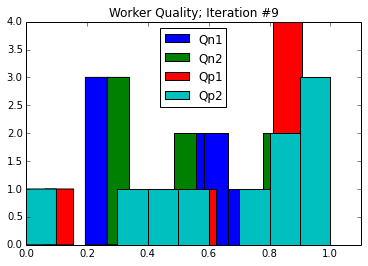

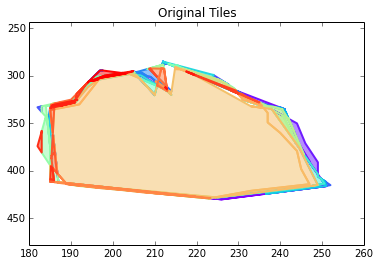

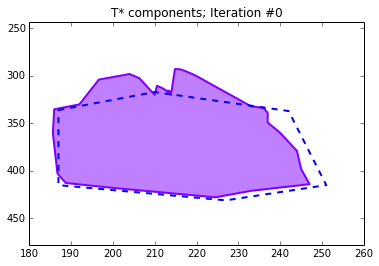

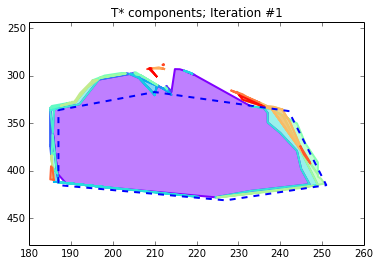

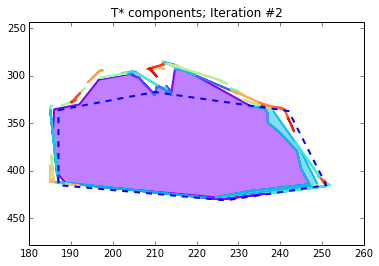

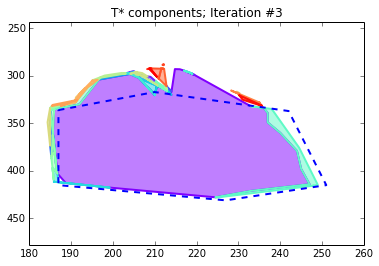

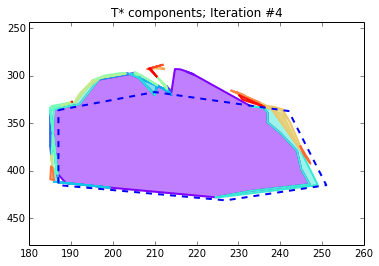

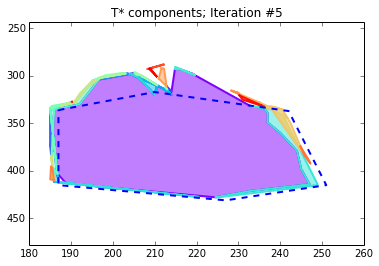

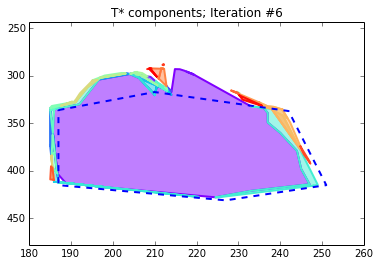

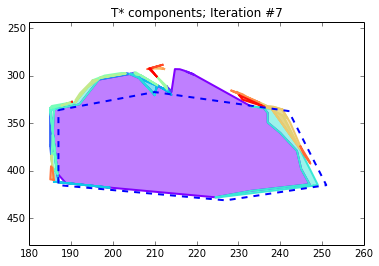

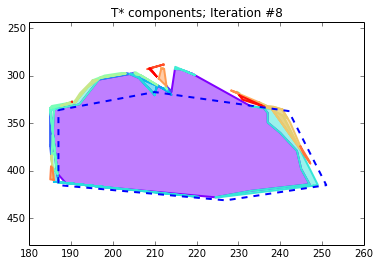

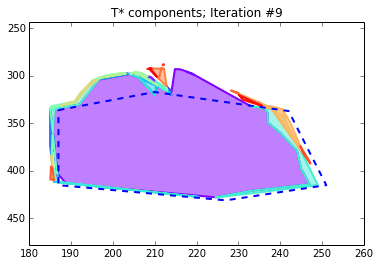

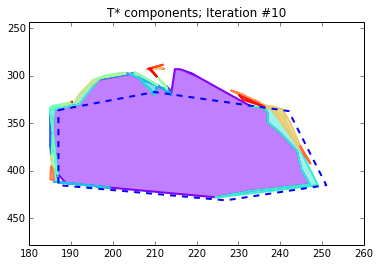

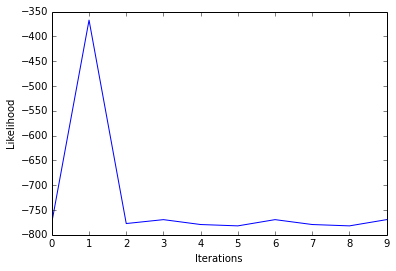

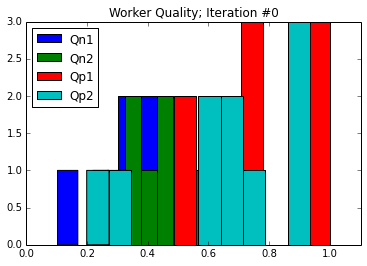

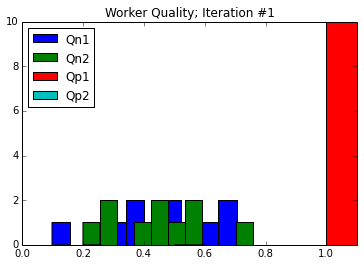

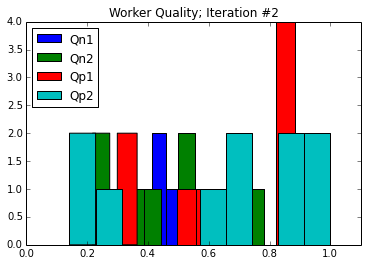

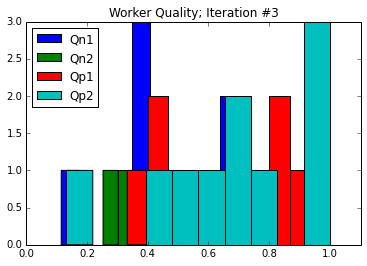

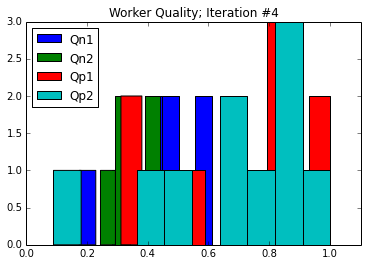

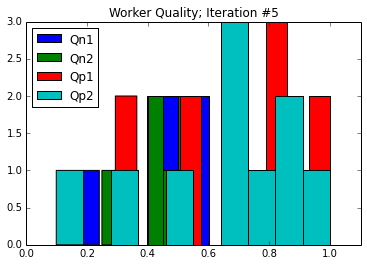

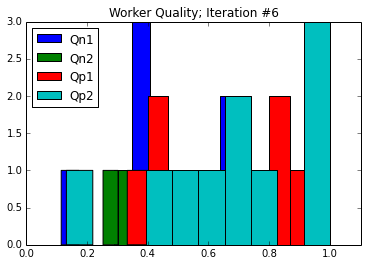

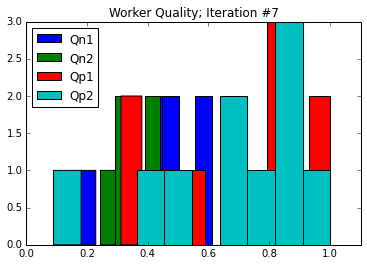

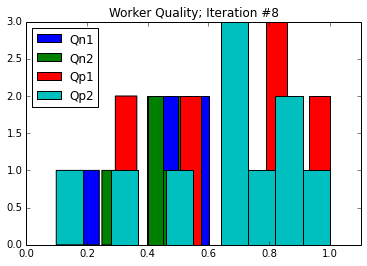

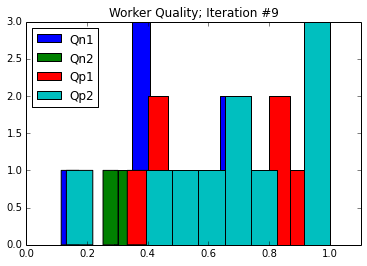

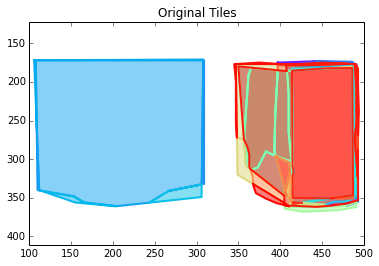

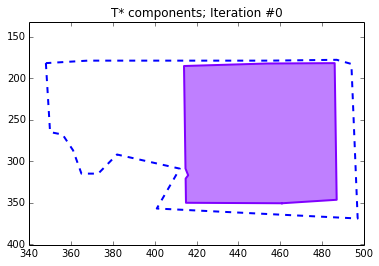

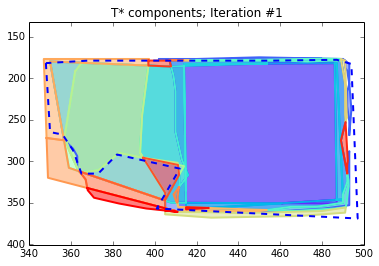

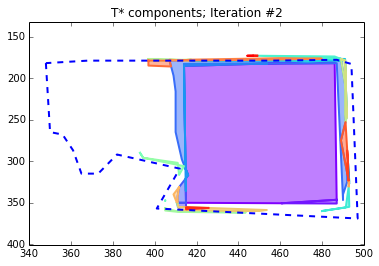

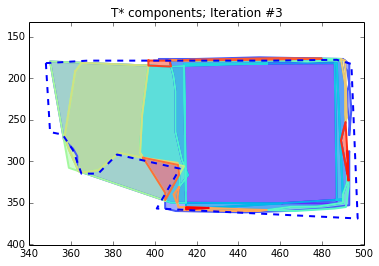

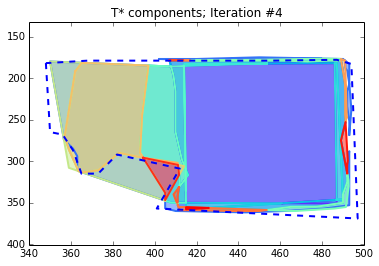

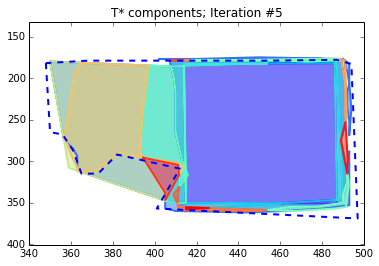

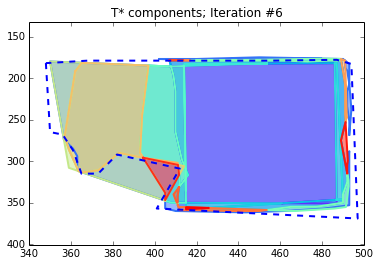

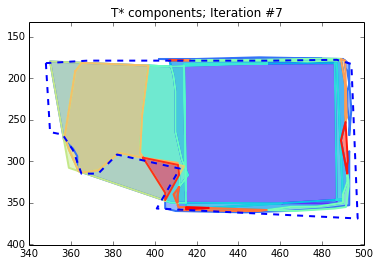

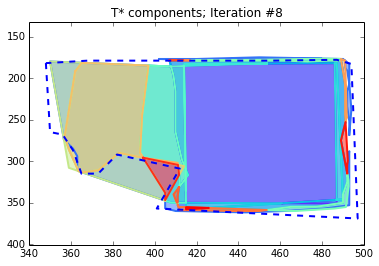

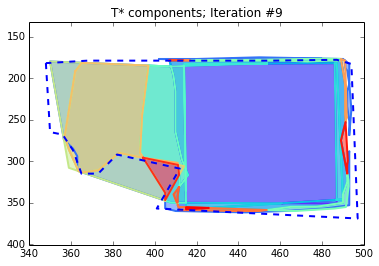

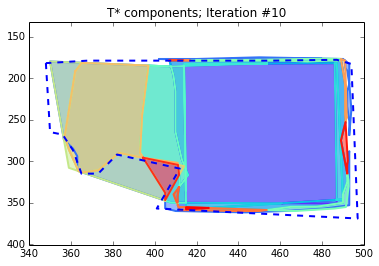

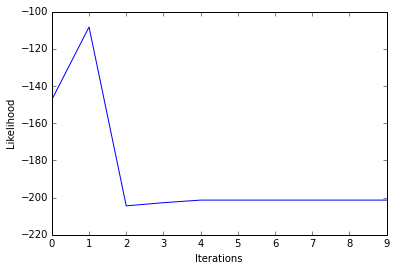

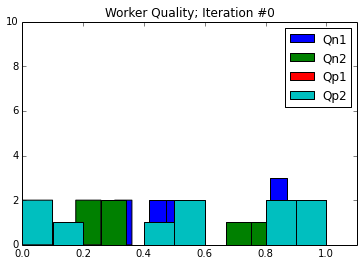

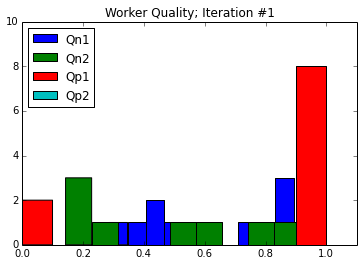

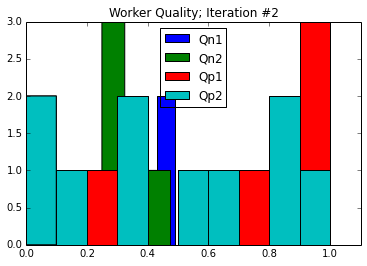

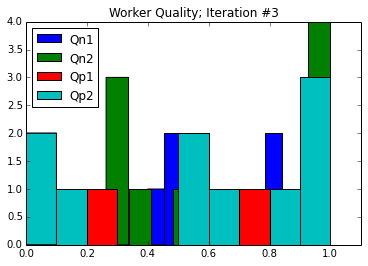

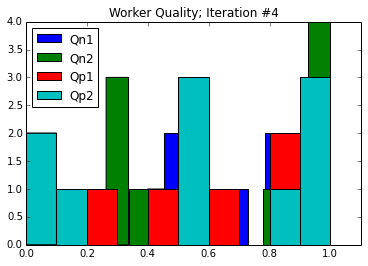

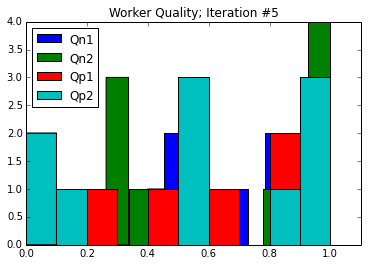

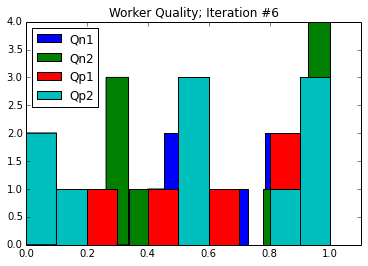

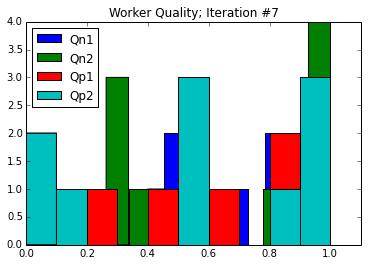

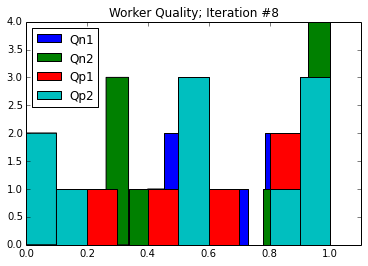

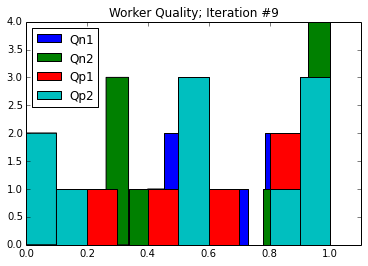

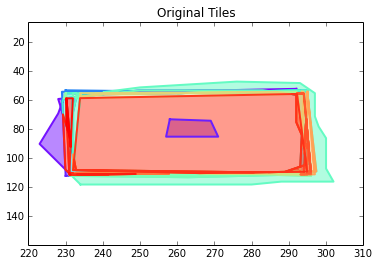

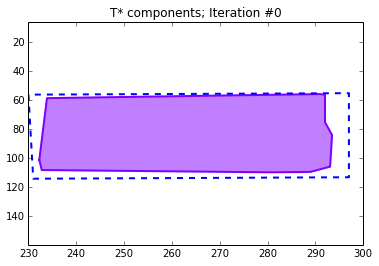

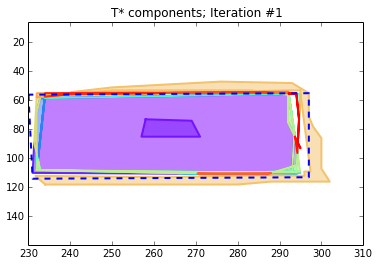

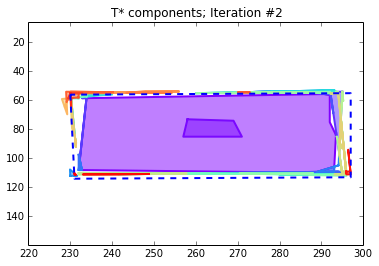

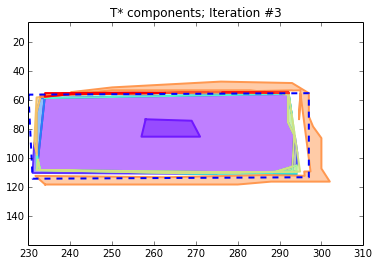

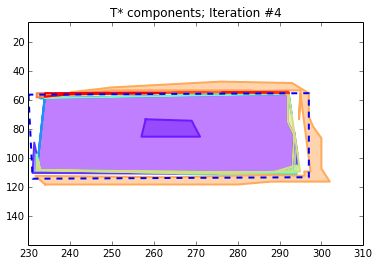

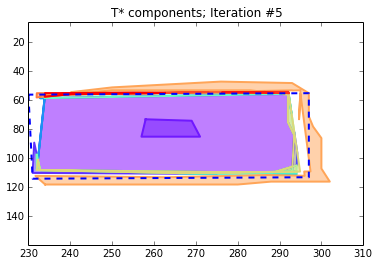

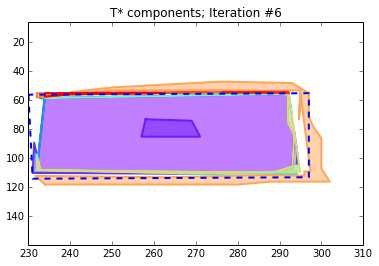

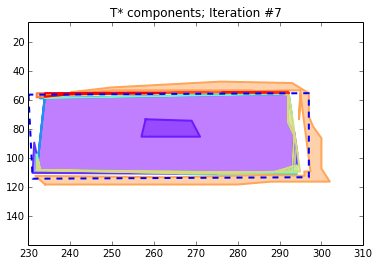

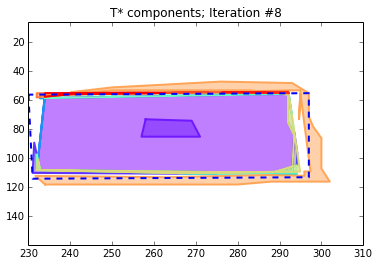

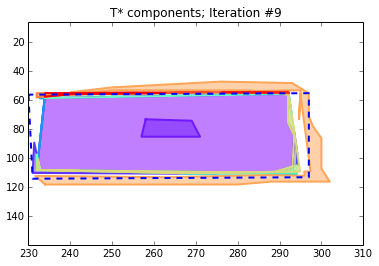

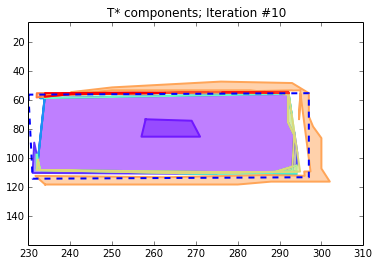

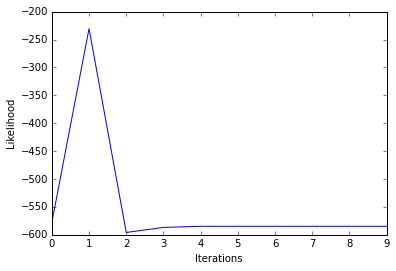

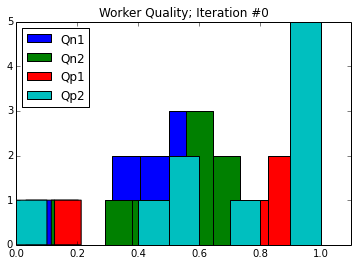

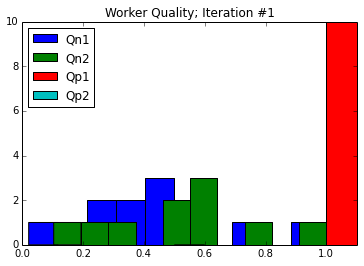

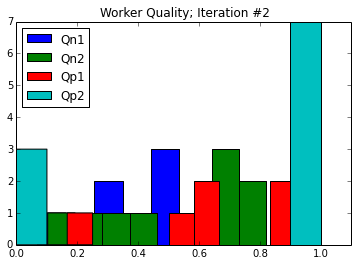

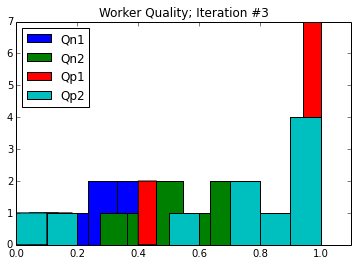

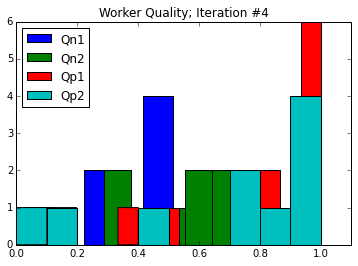

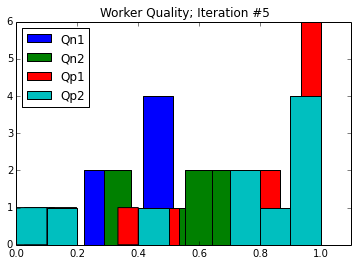

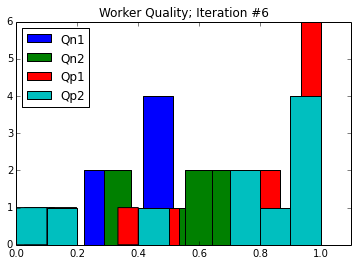

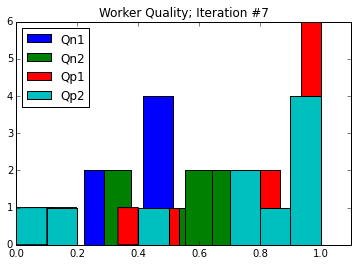

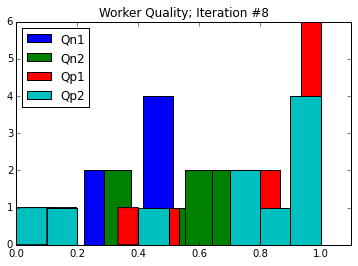

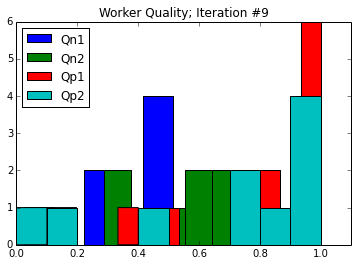

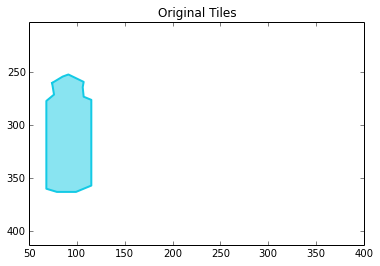

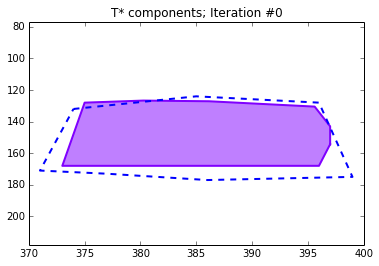

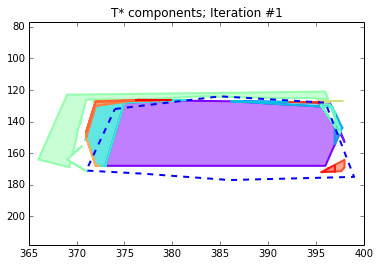

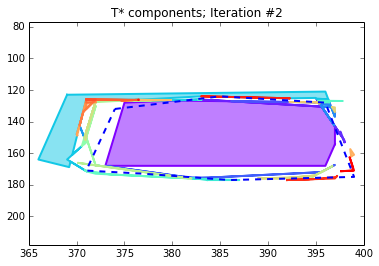

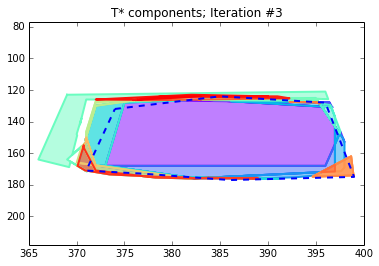

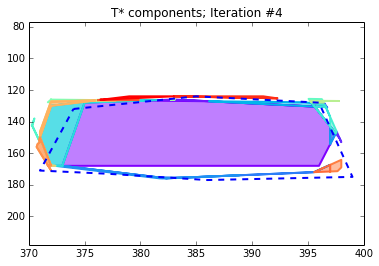

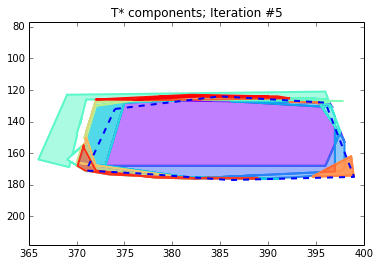

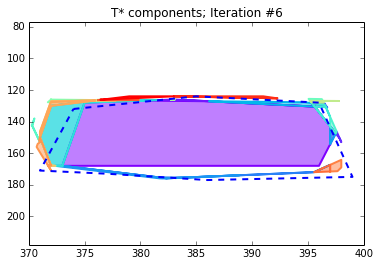

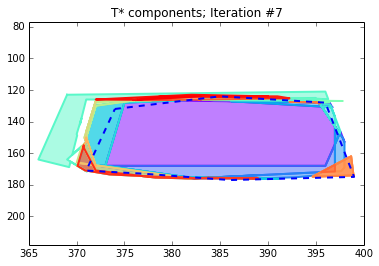

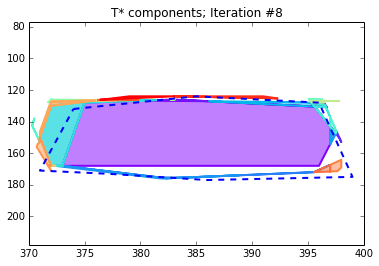

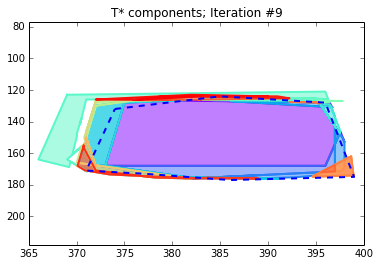

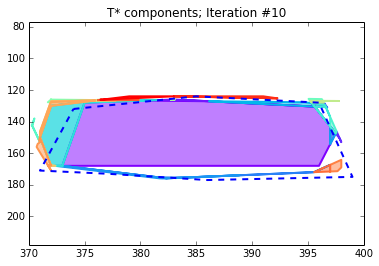

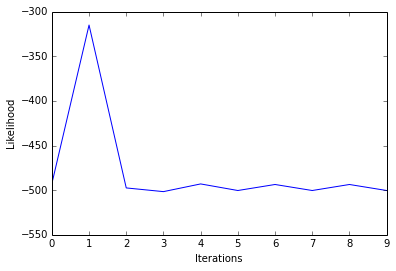

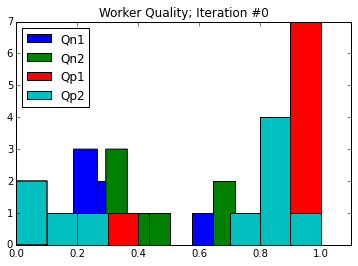

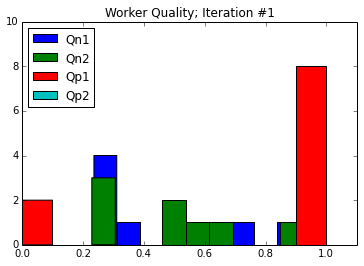

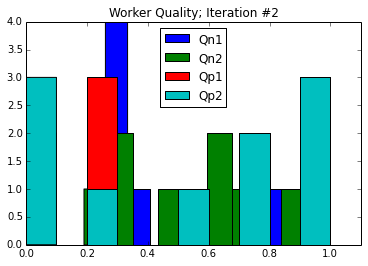

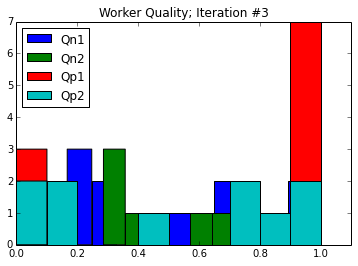

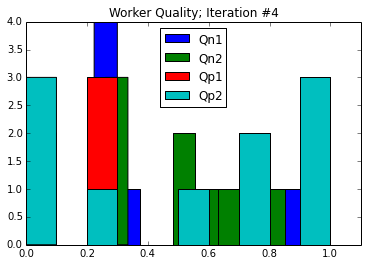

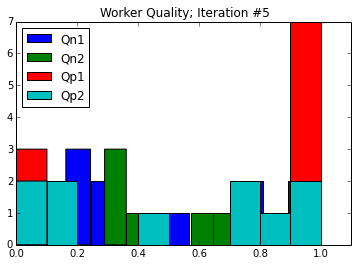

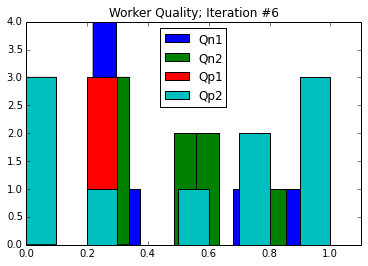

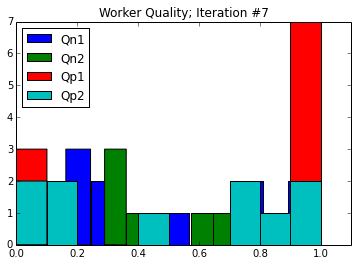

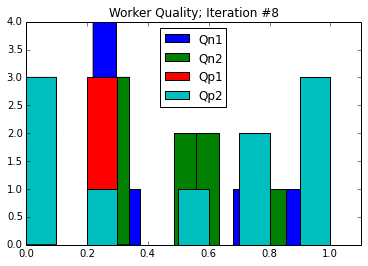

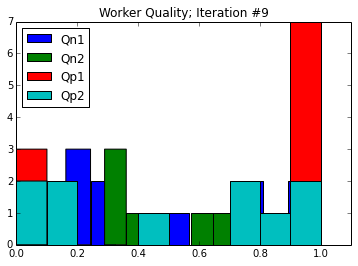

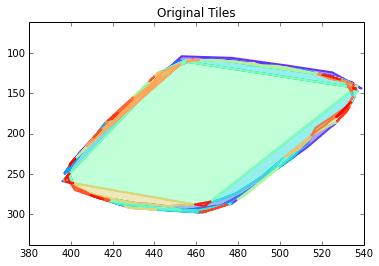

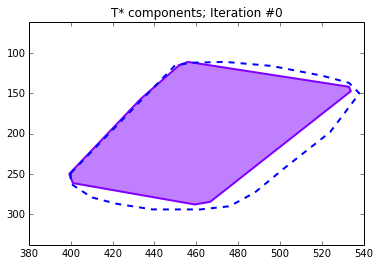

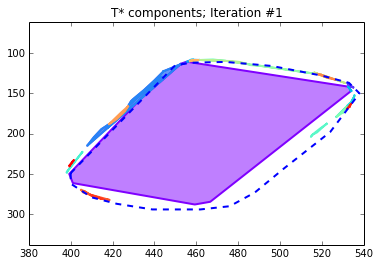

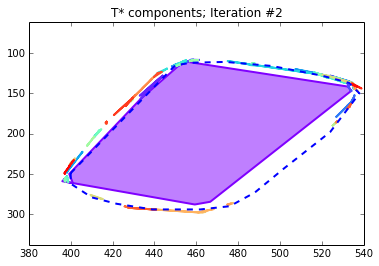

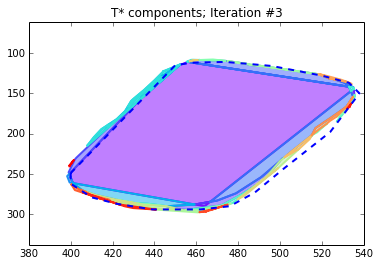

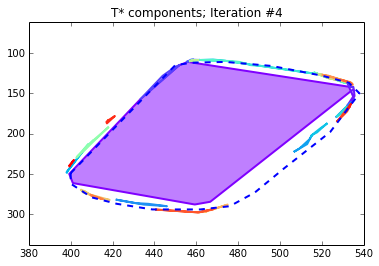

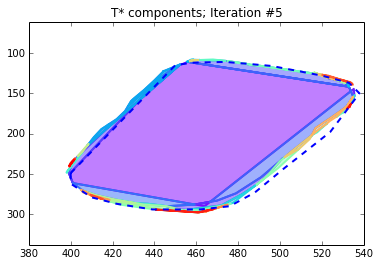

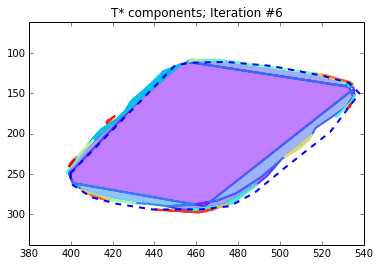

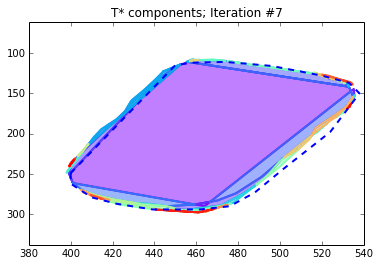

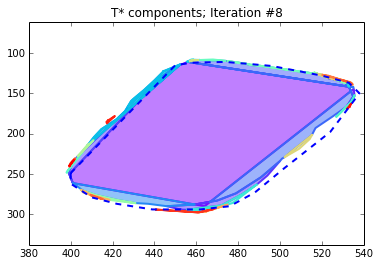

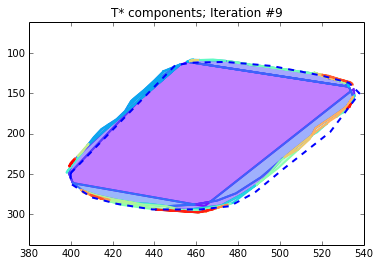

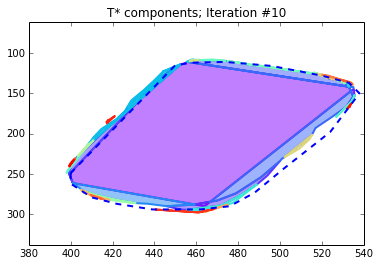

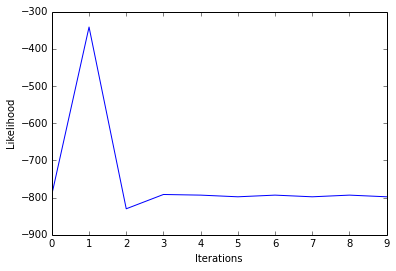

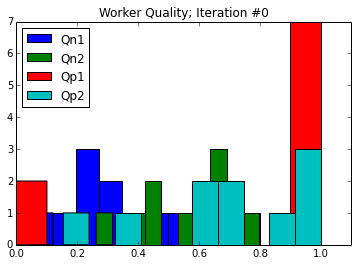

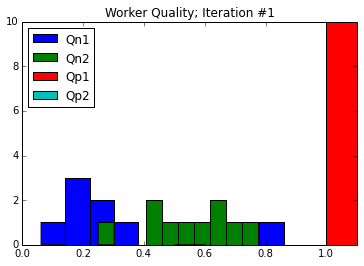

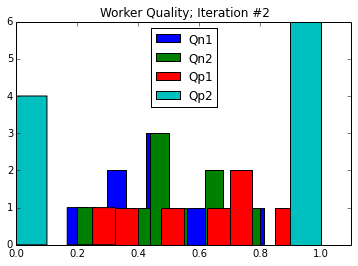

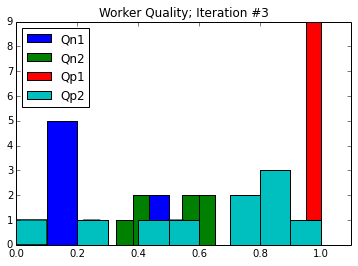

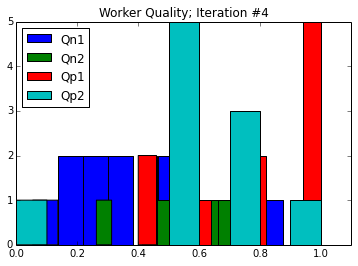

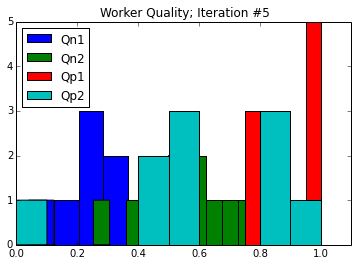

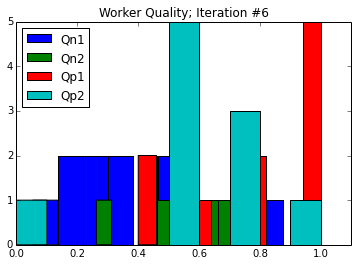

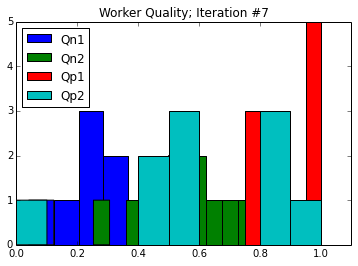

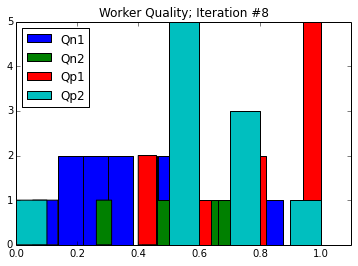

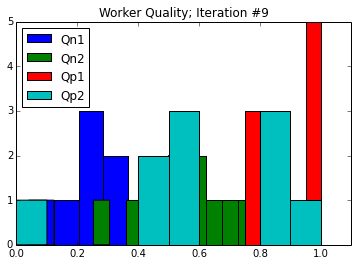

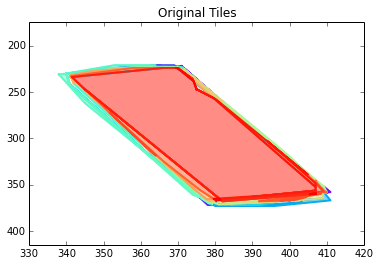

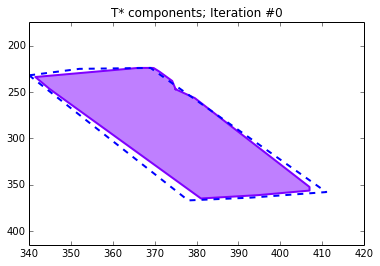

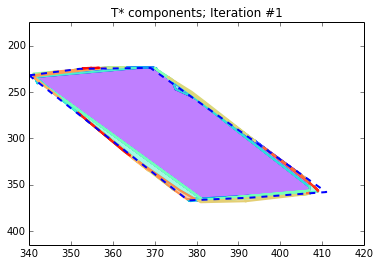

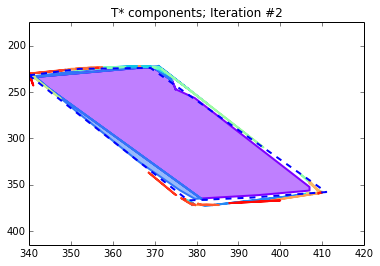

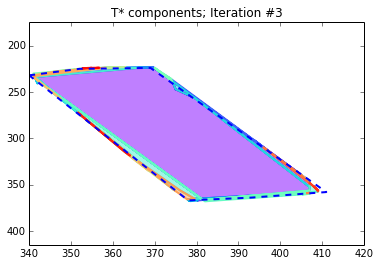

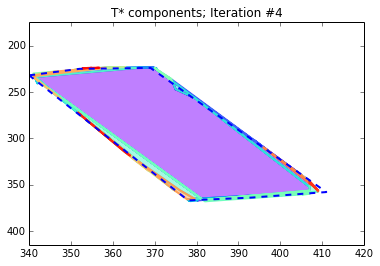

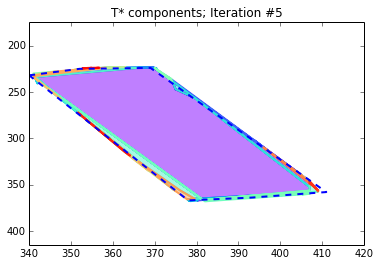

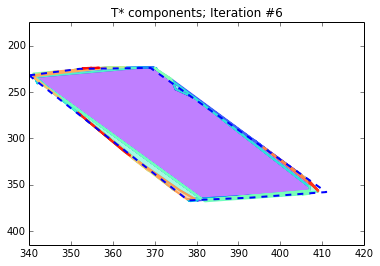

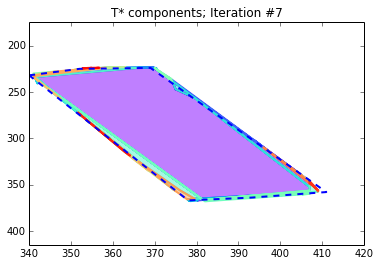

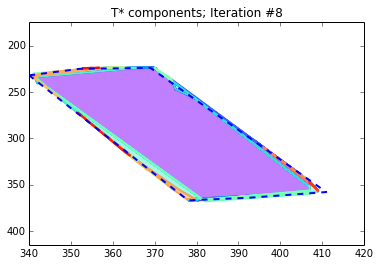

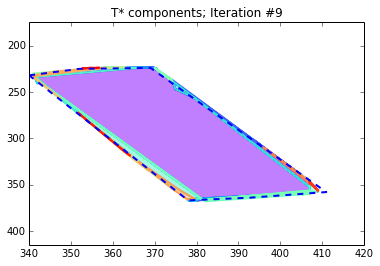

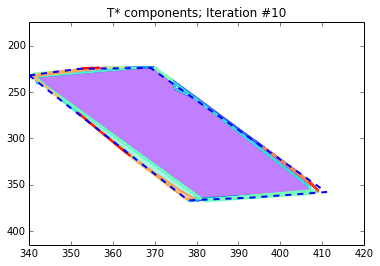

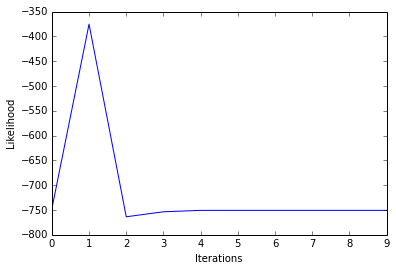

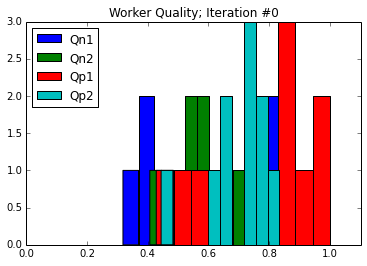

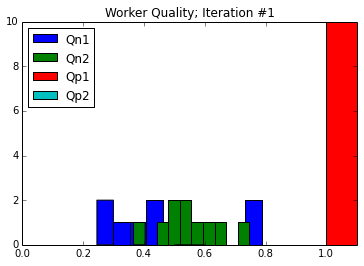

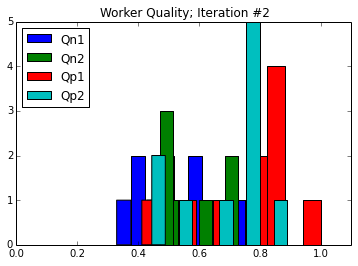

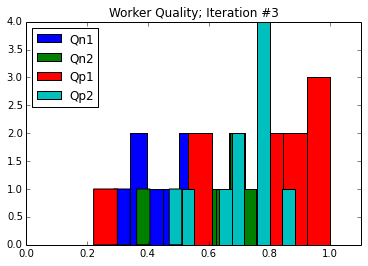

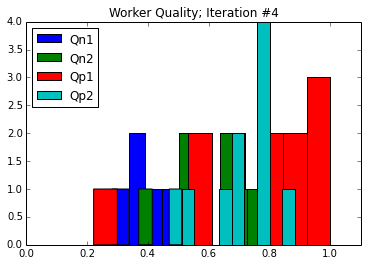

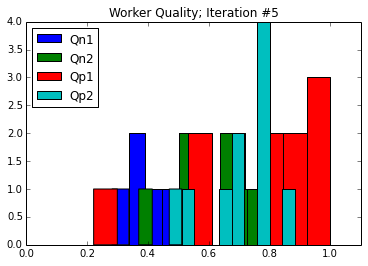

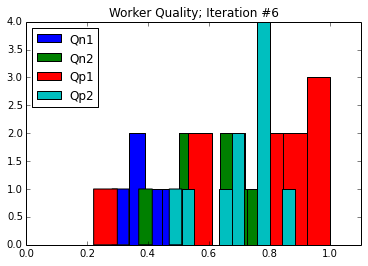

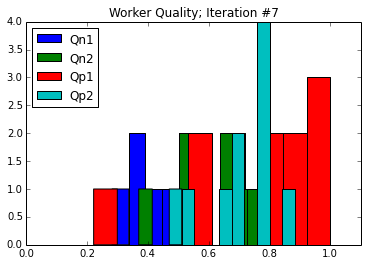

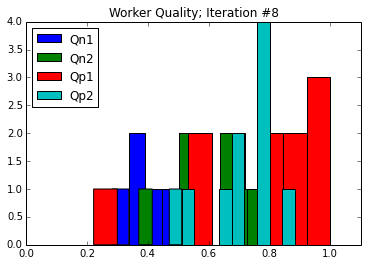

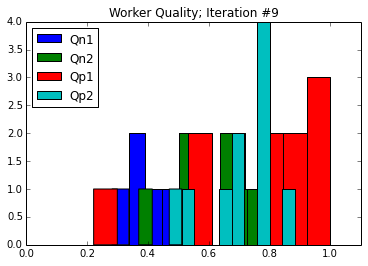

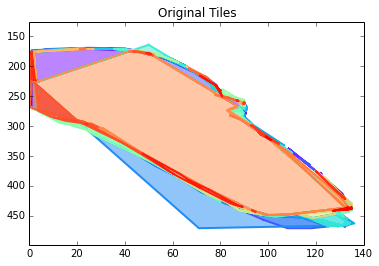

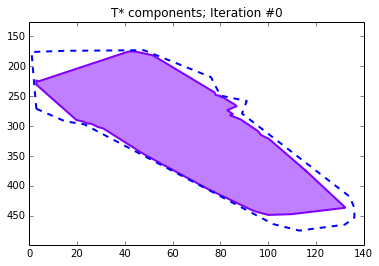

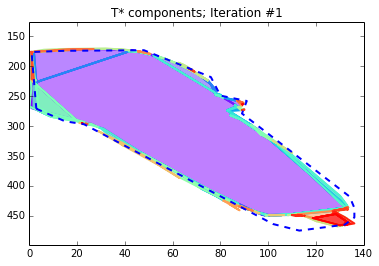

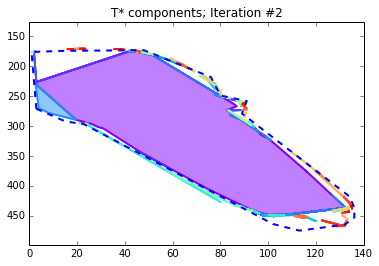

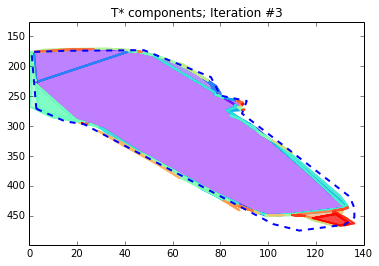

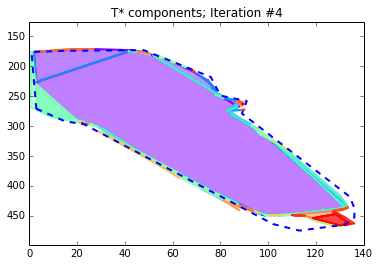

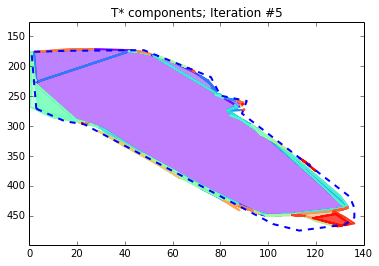

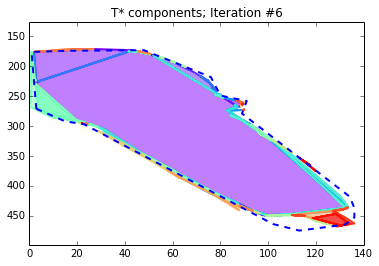

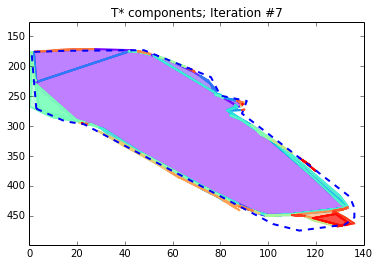

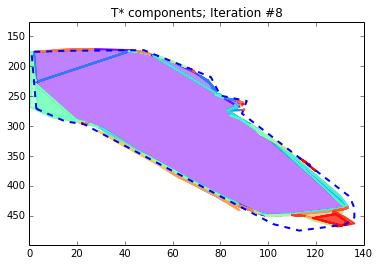

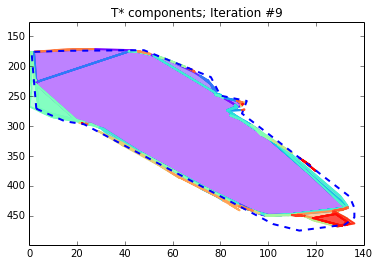

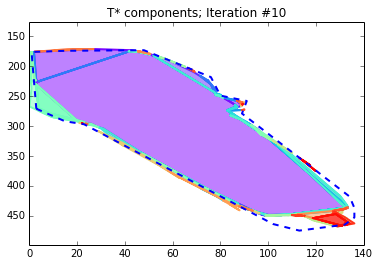

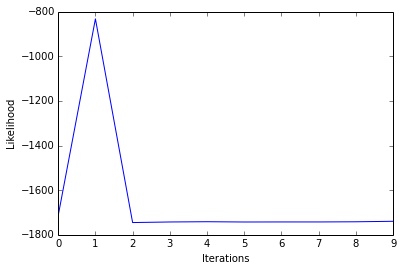

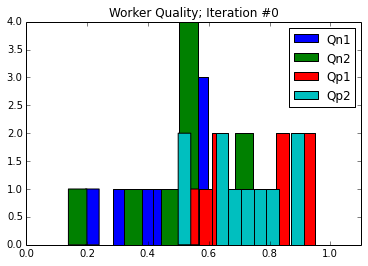

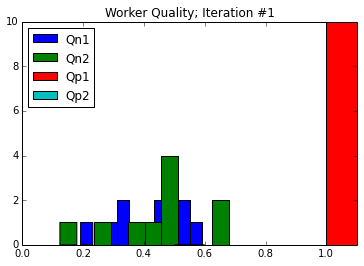

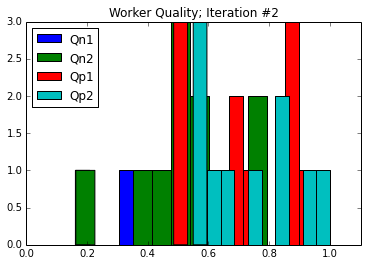

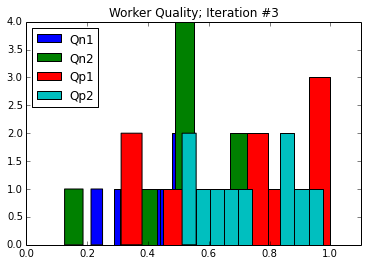

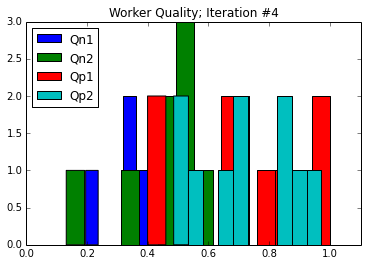

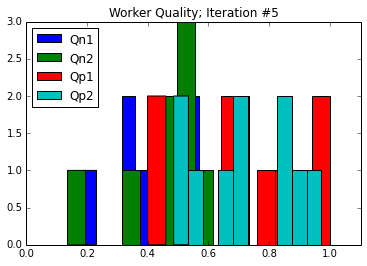

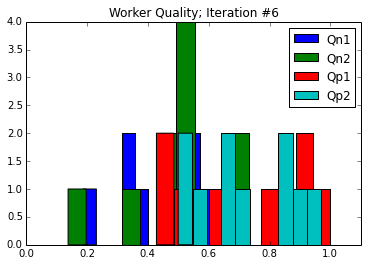

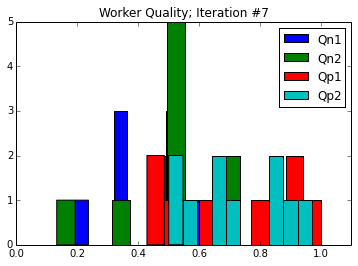

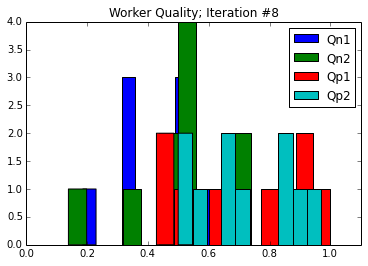

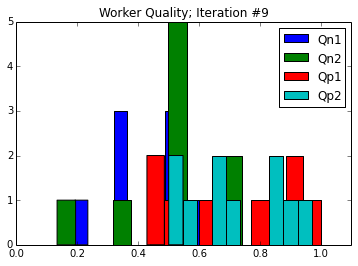

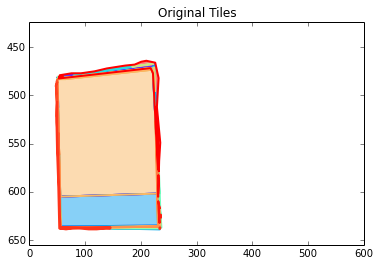

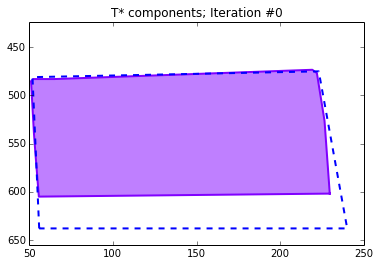

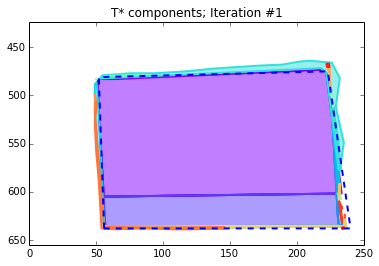

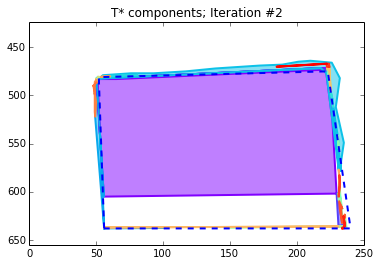

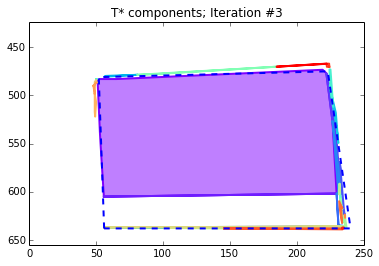

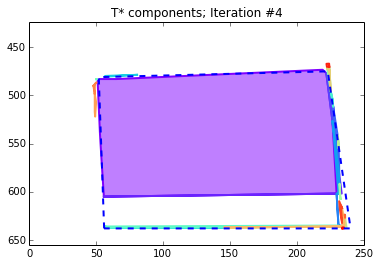

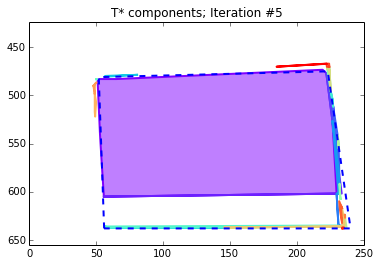

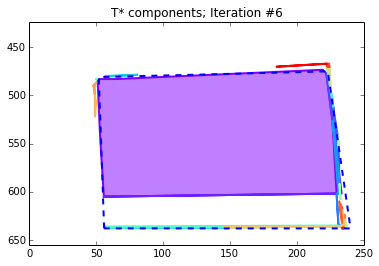

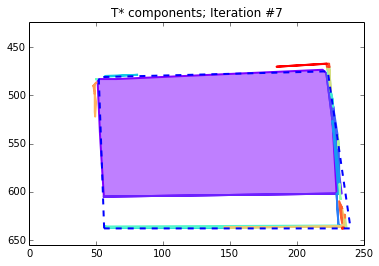

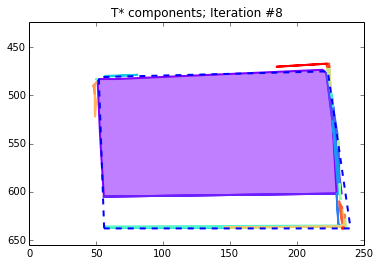

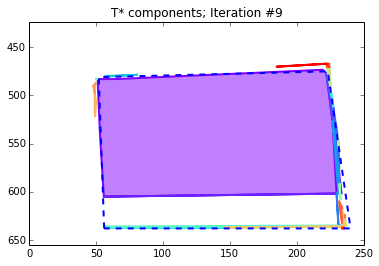

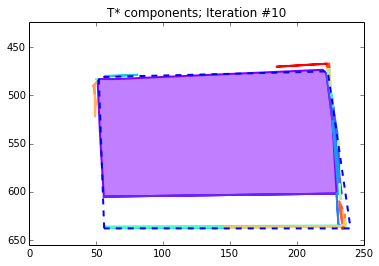

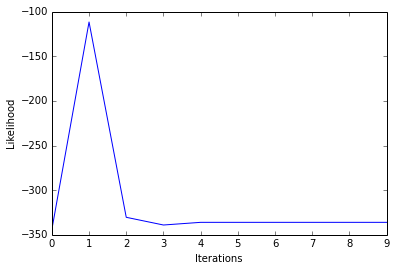

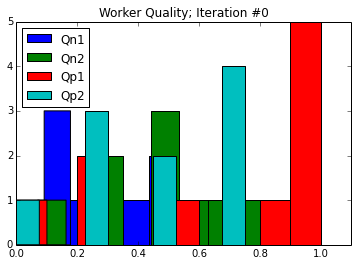

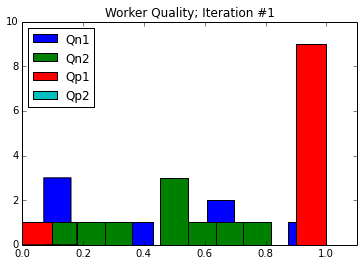

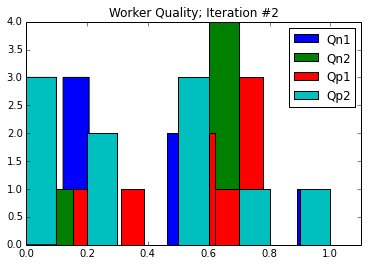

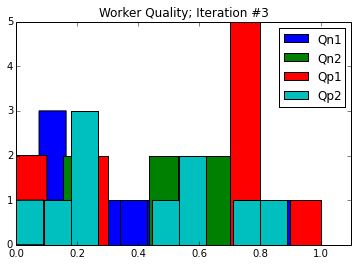

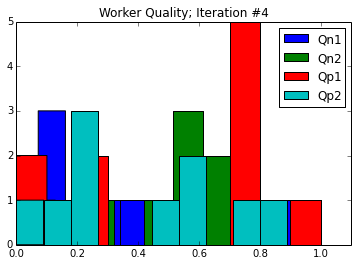

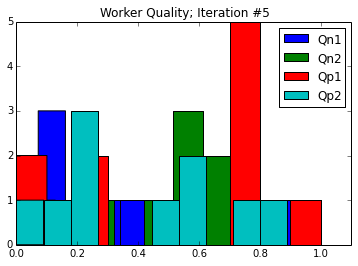

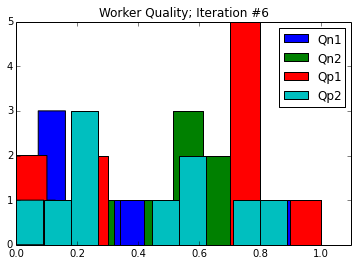

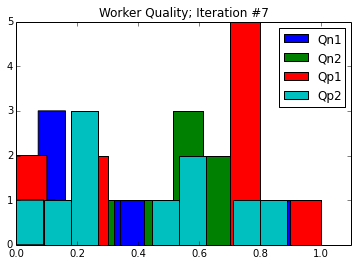

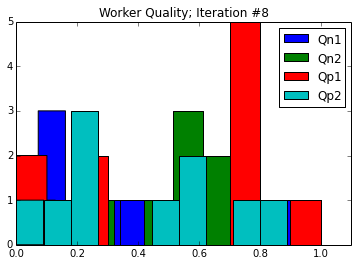

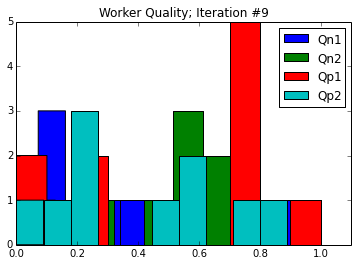

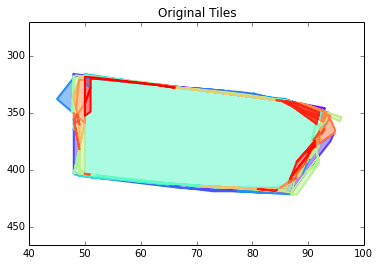

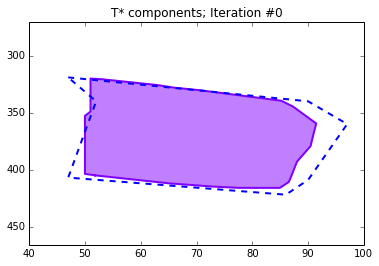

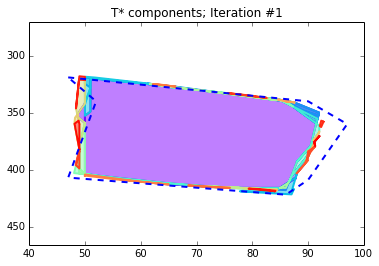

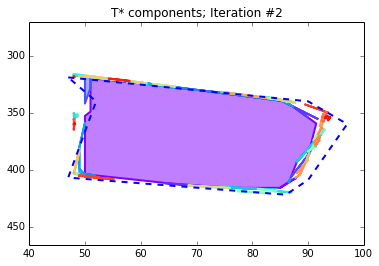

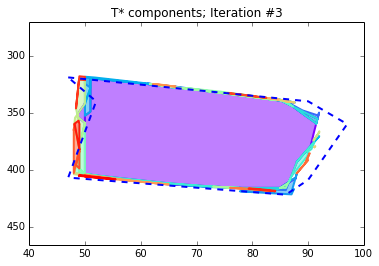

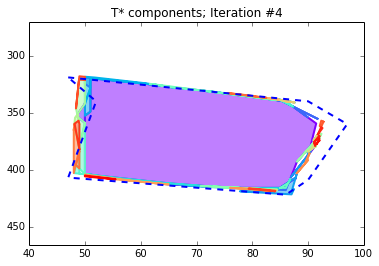

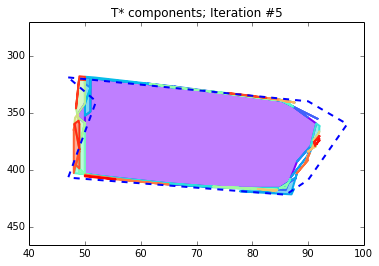

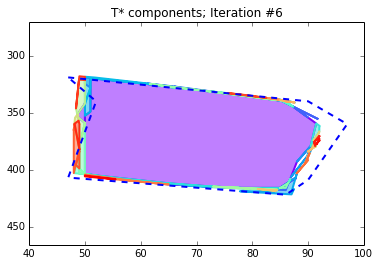

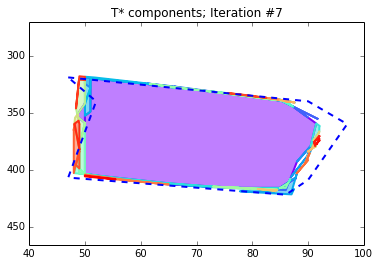

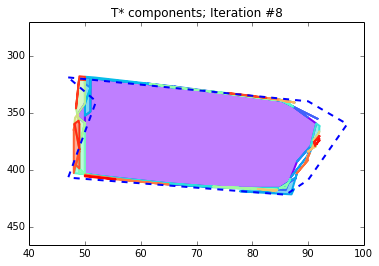

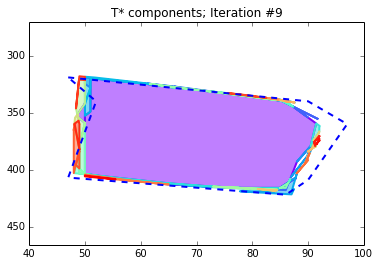

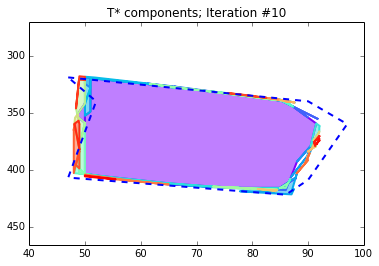

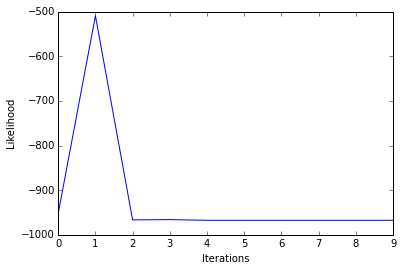

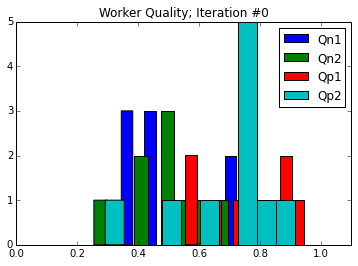

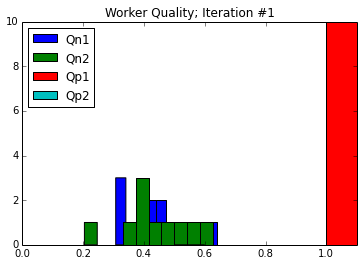

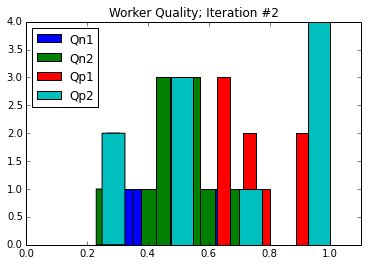

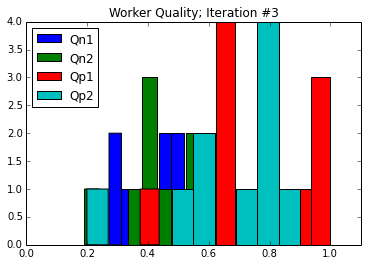

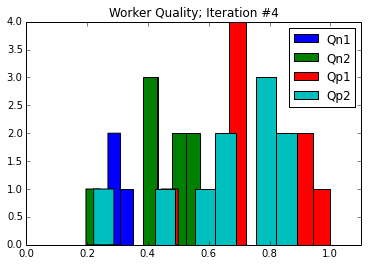

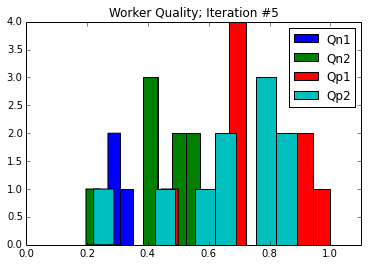

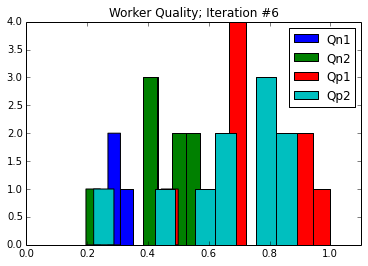

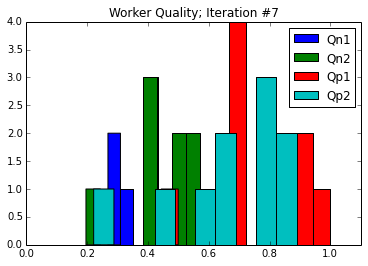

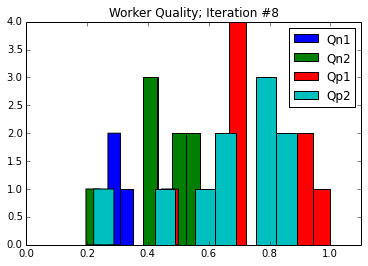

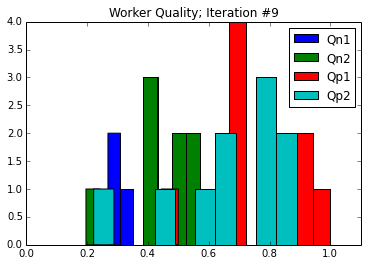

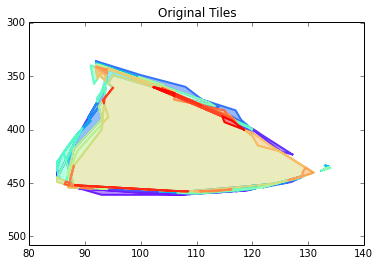

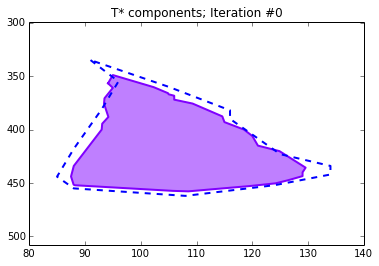

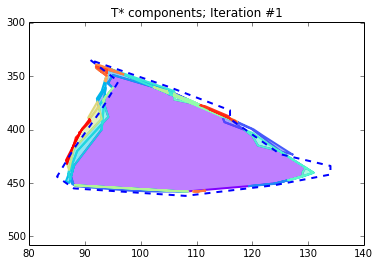

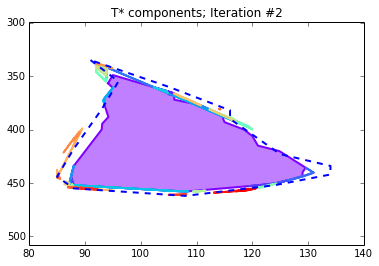

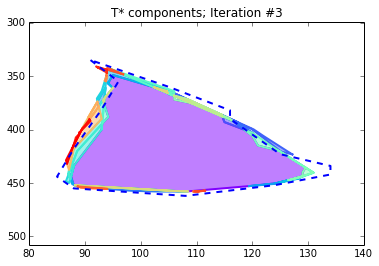

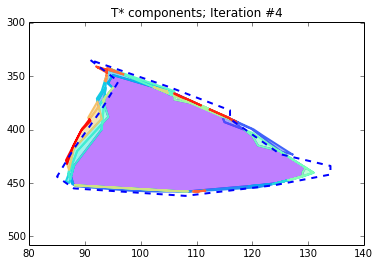

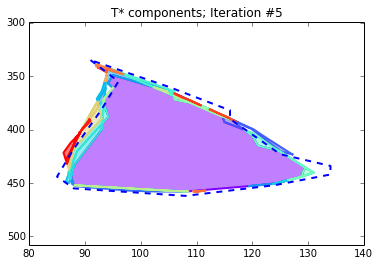

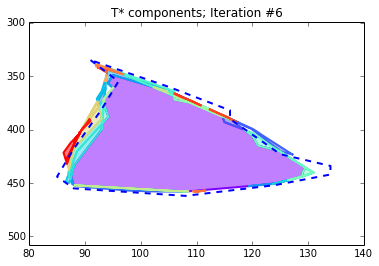

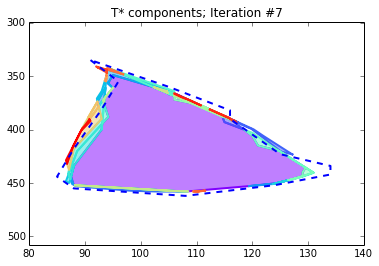

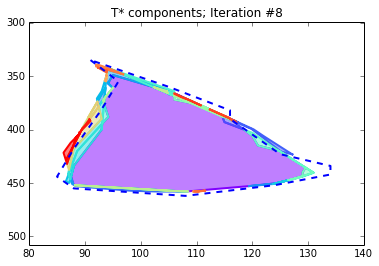

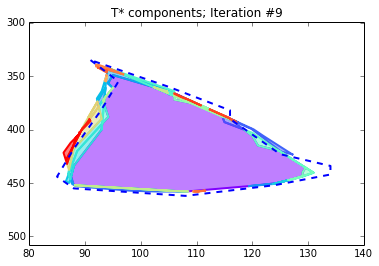

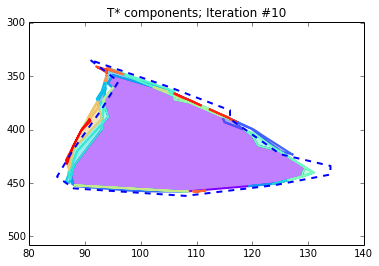

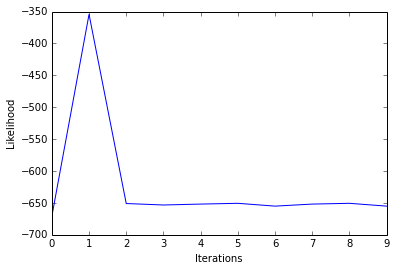

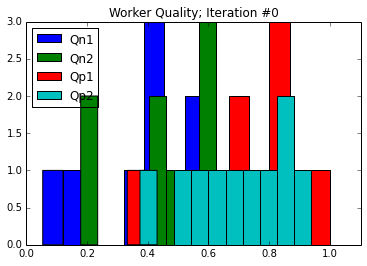

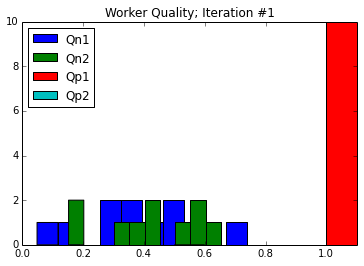

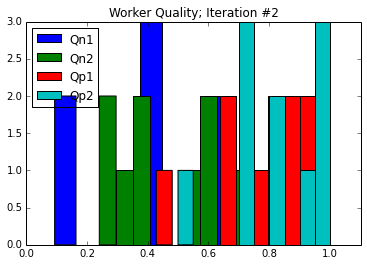

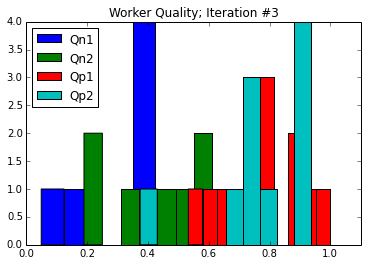

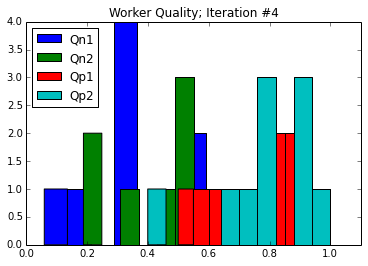

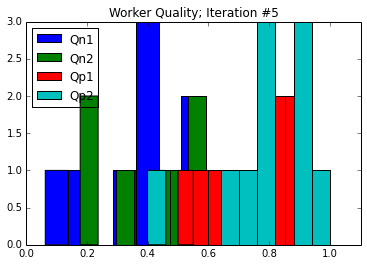

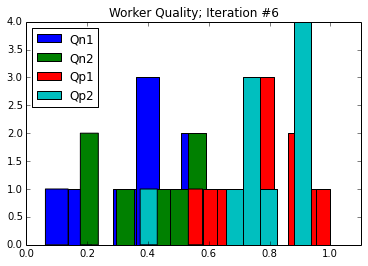

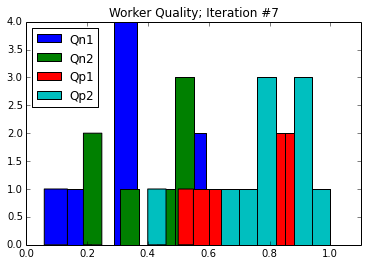

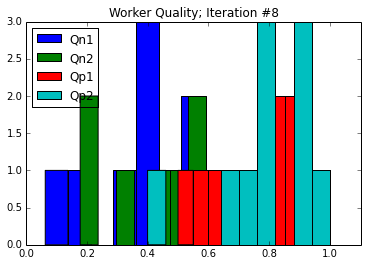

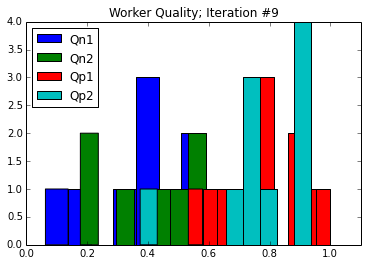

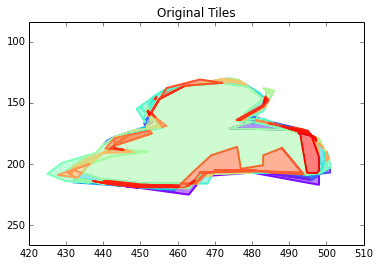

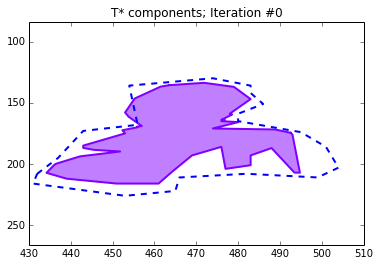

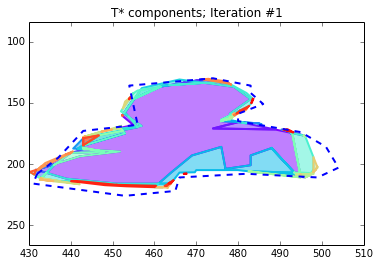

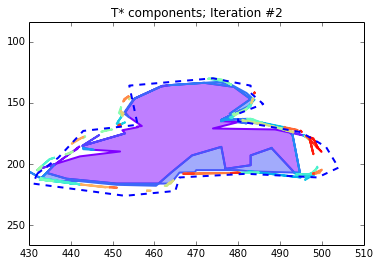

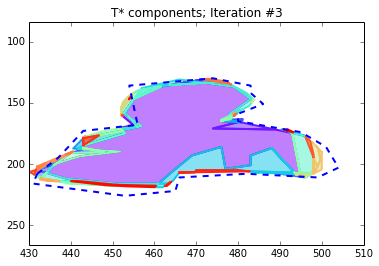

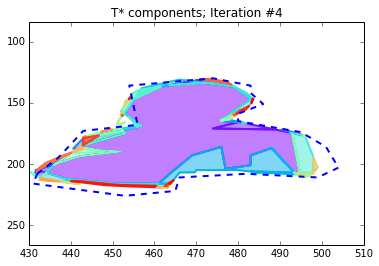

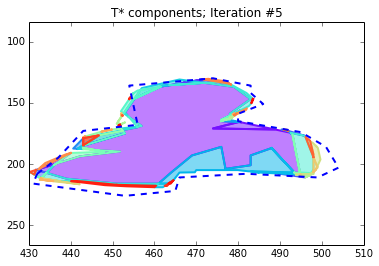

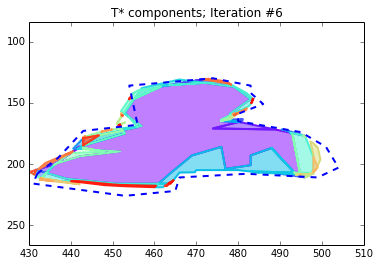

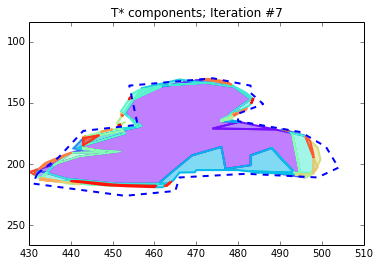

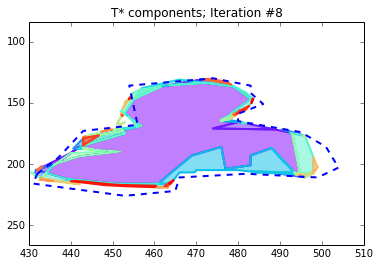

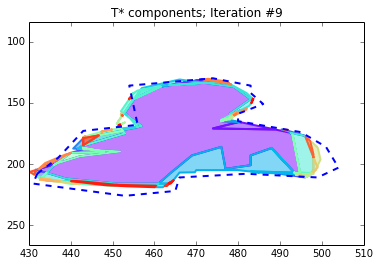

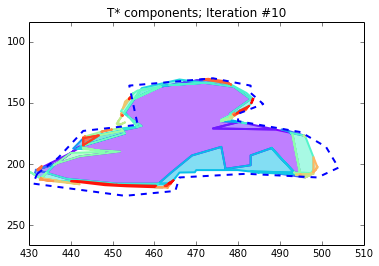

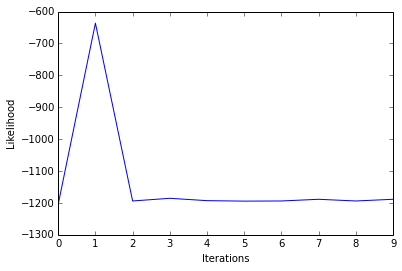

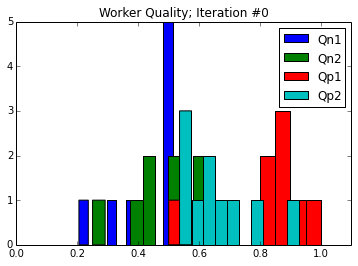

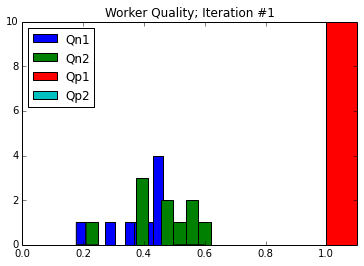

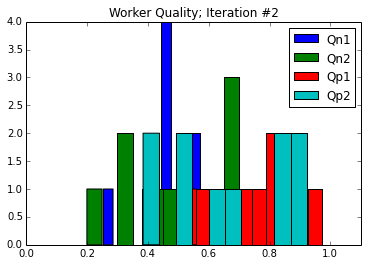

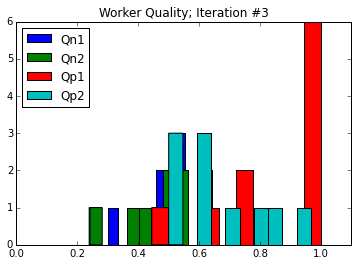

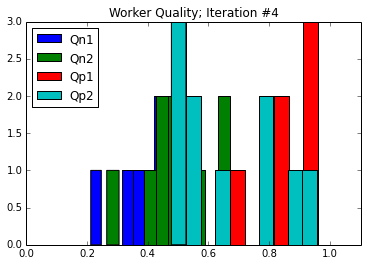

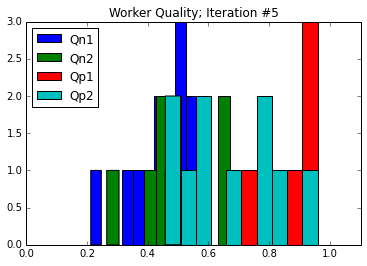

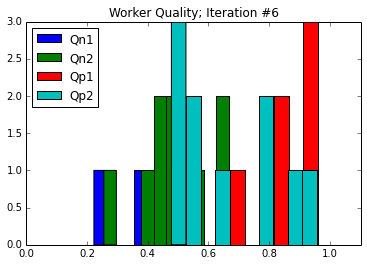

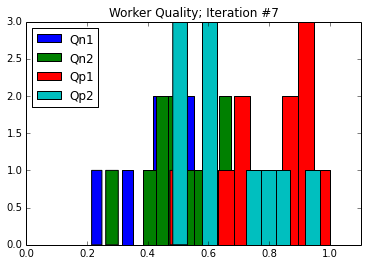

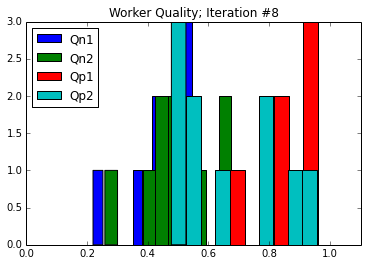

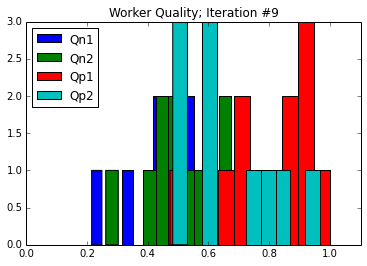

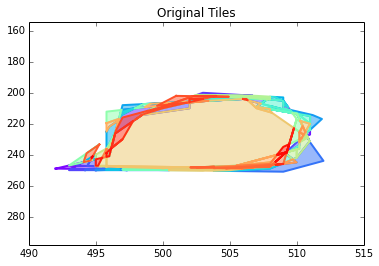

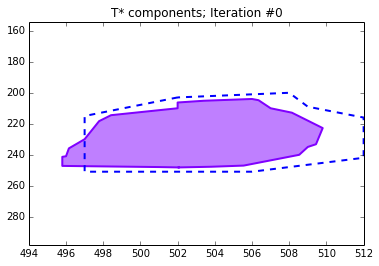

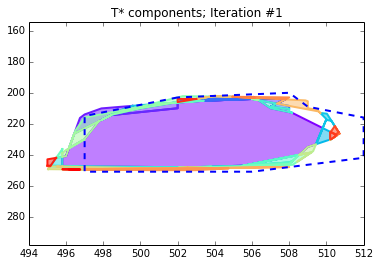

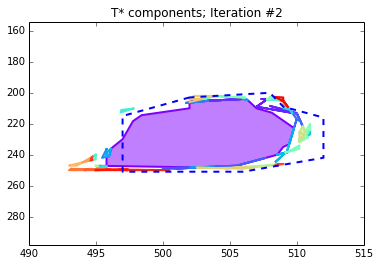

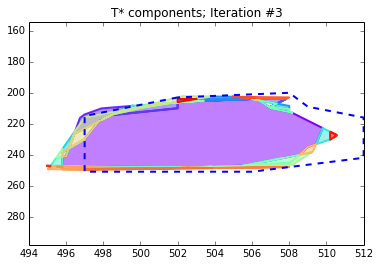

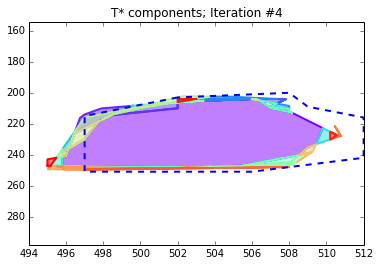

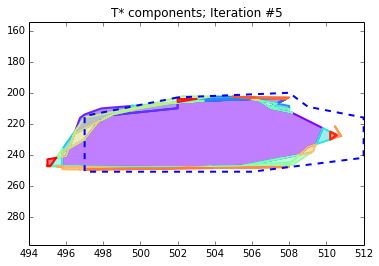

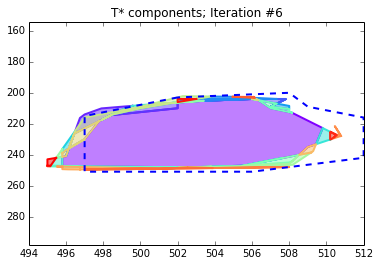

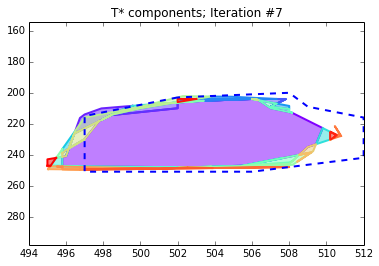

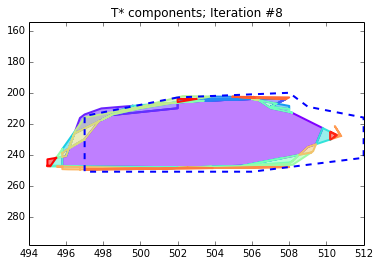

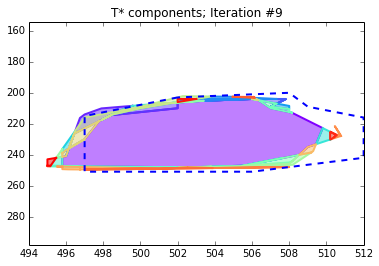

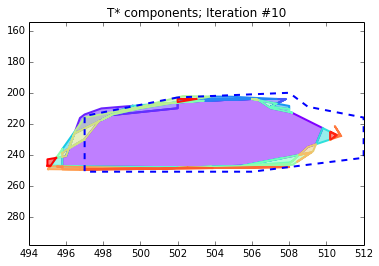

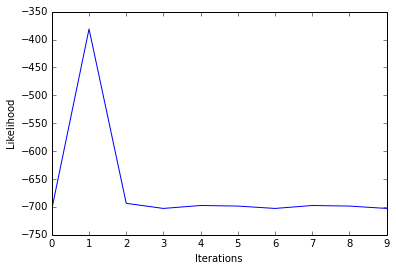

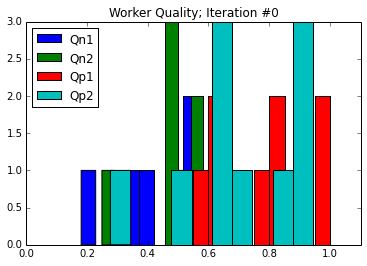

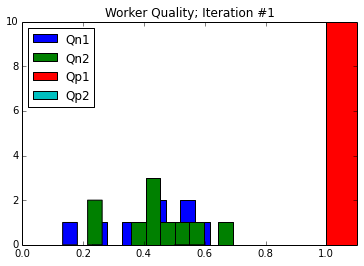

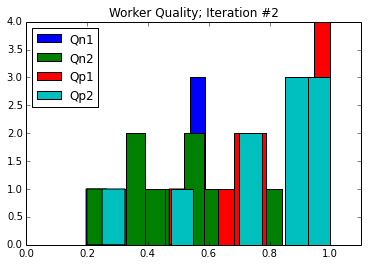

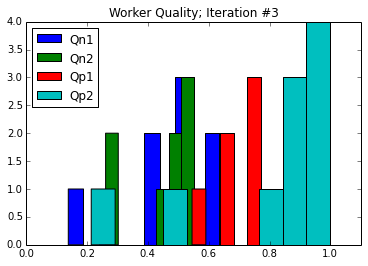

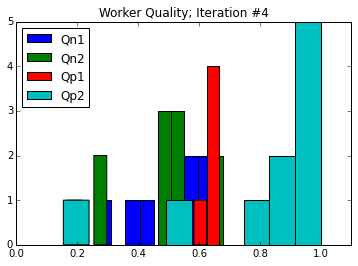

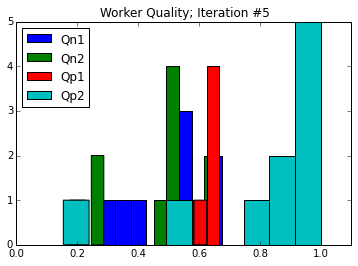

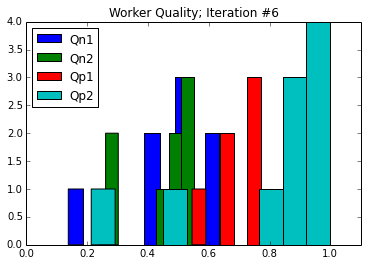

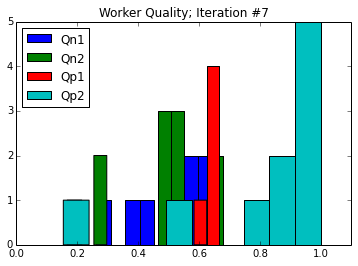

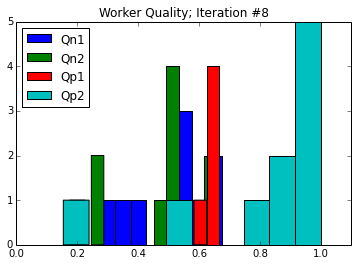

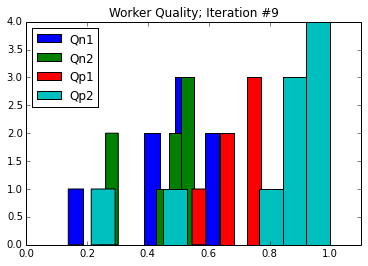

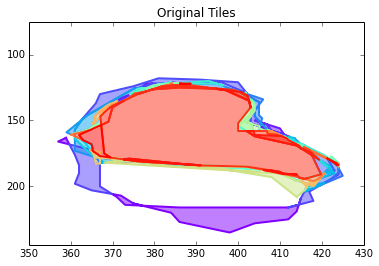

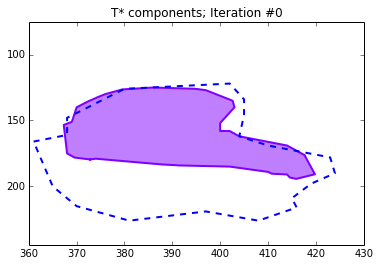

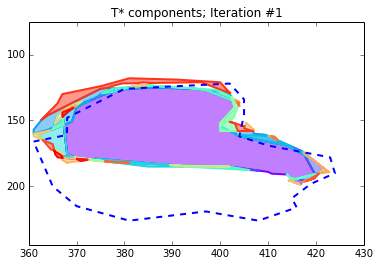

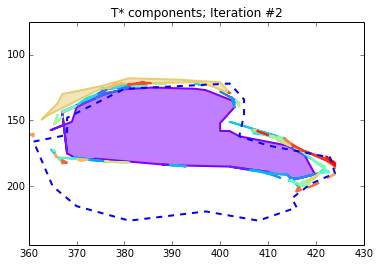

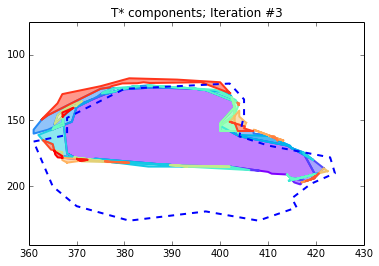

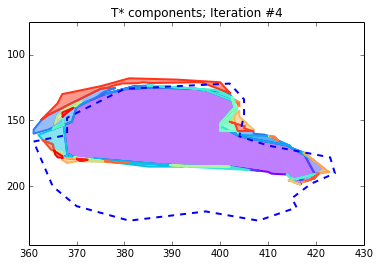

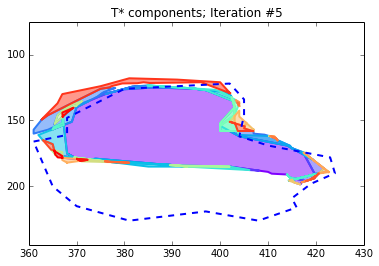

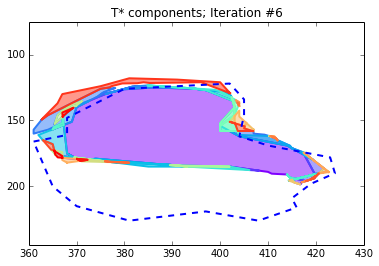

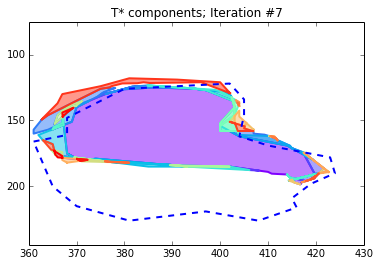

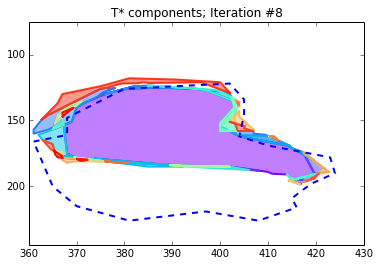

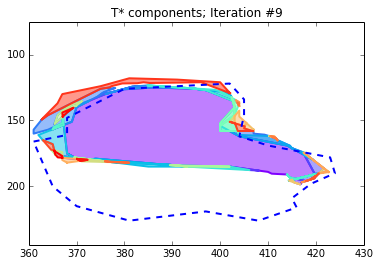

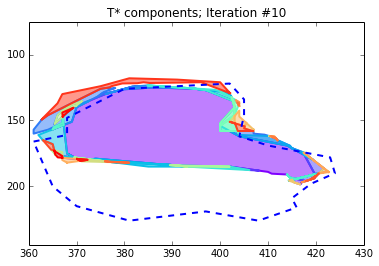

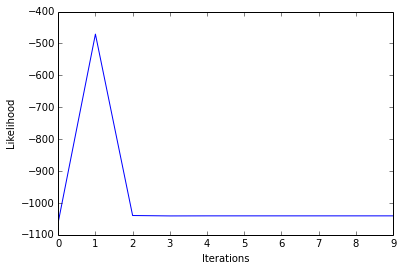

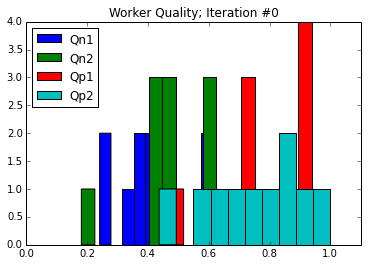

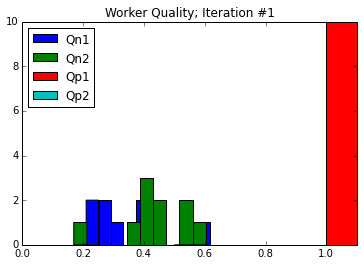

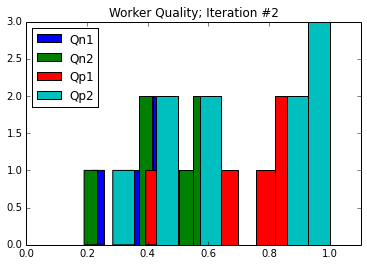

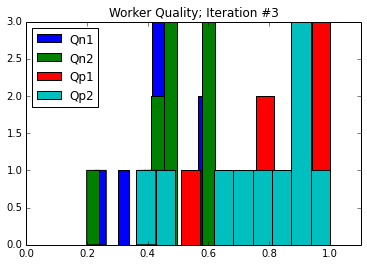

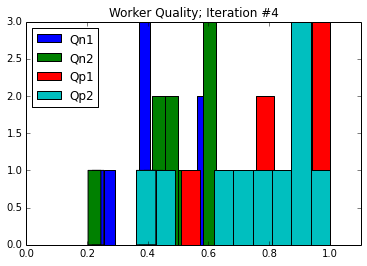

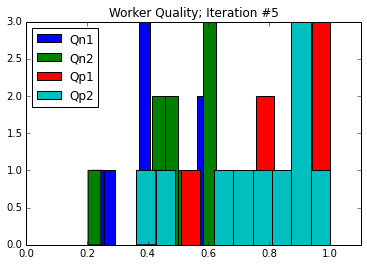

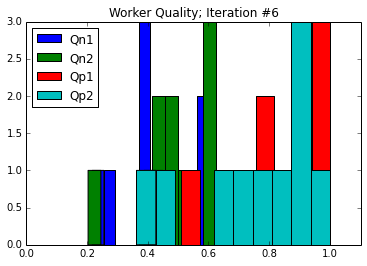

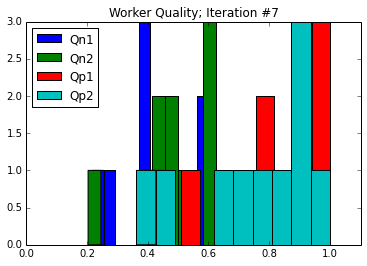

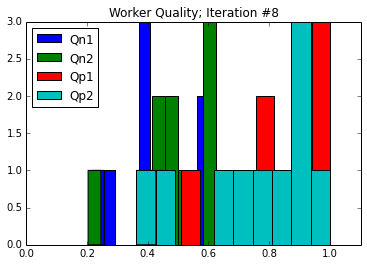

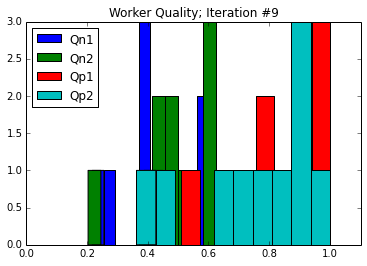

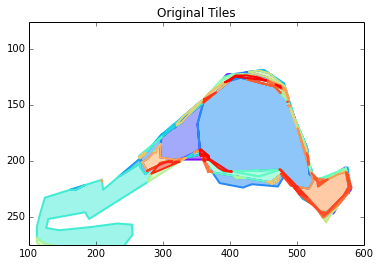

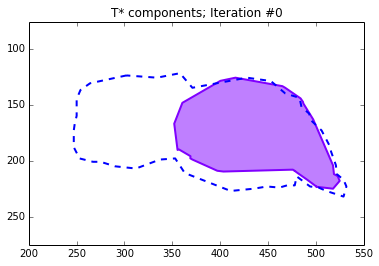

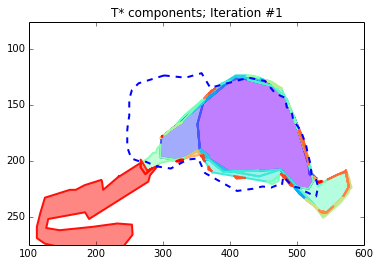

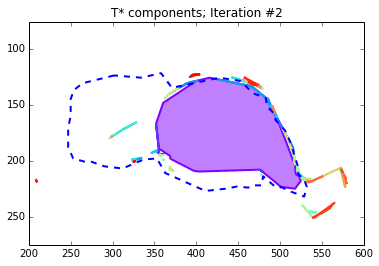

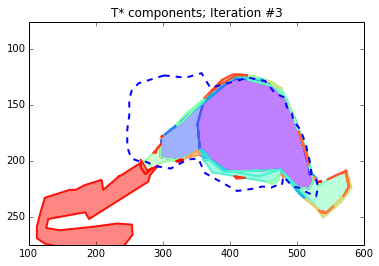

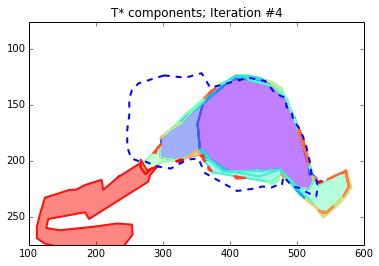

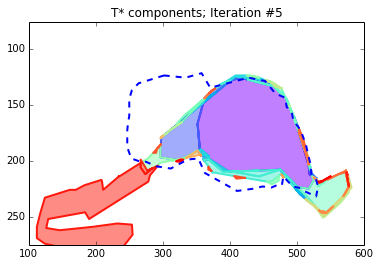

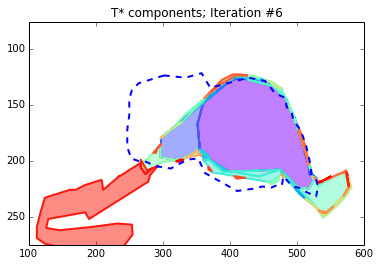

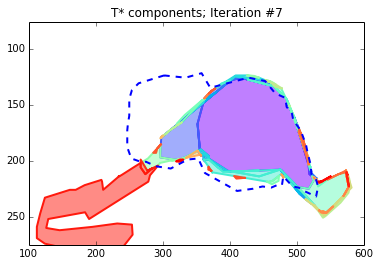

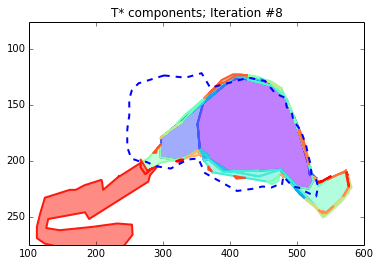

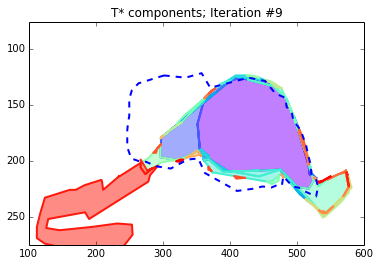

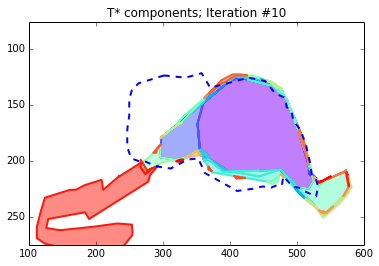

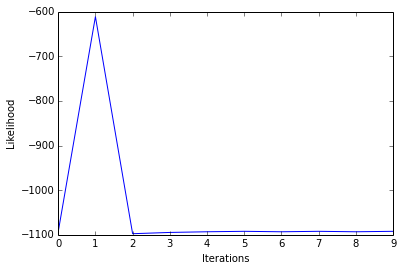

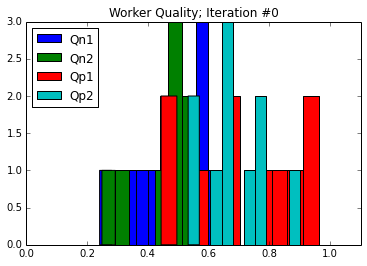

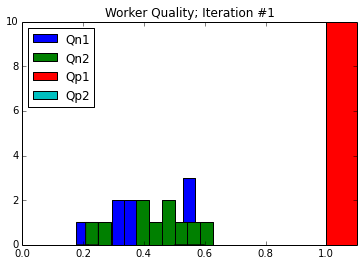

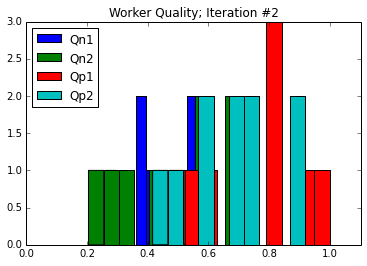

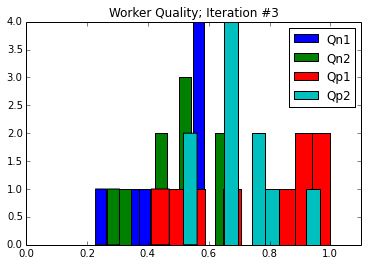

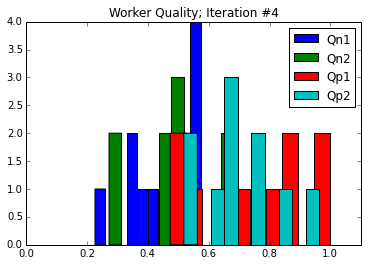

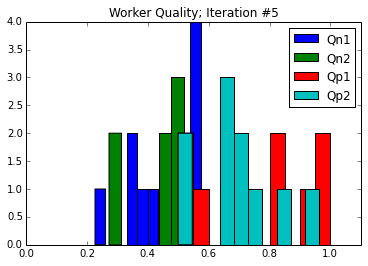

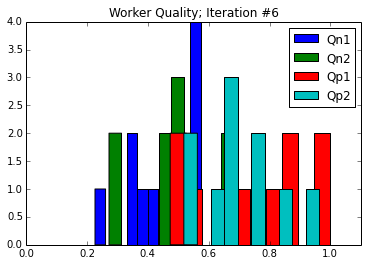

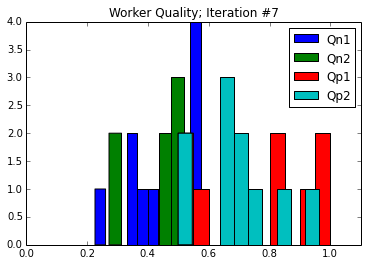

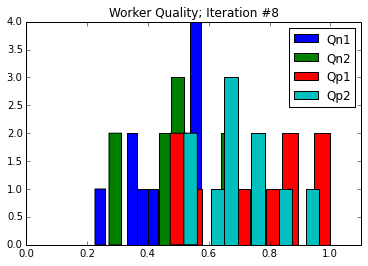

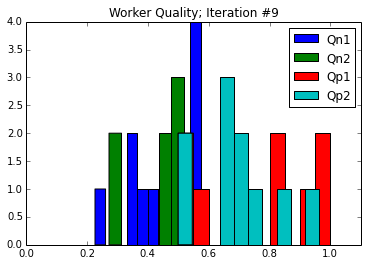

In [4]:
for fname in glob("output_15/Tstar_idx_obj*.pkl"):
    objid=int(fname.split("_")[-1].split(".")[0][3:])
    run_all_experiment_plots("output_15/",objid,1)

In [40]:
cd output_15/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output_15


In [41]:
my_BBG  = pd.read_csv("../my_ground_truth.csv")
for fname in glob("Tstar_idx_obj*.pkl"):
    objid=int(fname.split("_")[-1].split(".")[0][3:])
    #Ground truth BB 
    ground_truth_match = my_BBG[my_BBG.object_id==objid]
    x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
    BBG = shapely.geometry.Polygon(zip(x_locs,y_locs))
    Tstar_lst = pkl.load(open("Tstar_obj{}.pkl".format(objid)))
    print objid,poly_recall(Tstar_lst[-1][0].buffer(1e-10),BBG,3),poly_precision(Tstar_lst[-1][0].buffer(1e-10),BBG,3)

10 0.969 0.957
11 0.802 0.925
12 0.885 0.973
13 0.945 0.972
14 0.932 0.976
15 0.33 0.771
16 0.976 0.957
17 0.933 0.901
18 0.965 0.99
2 0.969 0.854
20 0.97 0.888
21 0.92 0.843
22 0.806 0.767
23 0.804 0.977
24 0.992 0.957
26 0.935 0.973
27 0.978 0.942
28 0.771 0.927
3 0.91 0.959
4 0.915 0.958
5 0.855 0.979
6 0.826 0.931
7 0.539 0.848
8 0.676 0.632


# Errors: 

```
python -i TileEM.py
Working on Object # 19
Compute Core Tiles
Initialize Tiles
No handlers could be found for logger "shapely.geos"
Estimate based on initial tileset and get good Qjs
Qj:  [(0.5714285714285714, 0.6625, 0.76, 0.6153846153846154), (0.5714285714285714, 0.7, 0.64, 0.5384615384615384), (0.23809523809523808, 0.4375, 0.92, 0.8076923076923077), (0.5238095238095238, 0.5125, 0.56, 0.7307692307692307), (0.07142857142857142, 0.2625, 1.0, 1.0), (0.42857142857142855, 0.3875, 0.8, 0.6923076923076923), (0.6428571428571429, 0.7375, 0.48, 0.5384615384615384), (0.4523809523809524, 0.7125, 0.72, 0.5384615384615384), (0.42857142857142855, 0.55, 0.84, 0.9230769230769231), (0.5476190476190477, 0.55, 0.72, 0.6923076923076923)]
  0%|                                                                                                                                                 | 0/10 [00:00<?, ?it/s]Iteration # 0
ML construction of Tstar
Add core tiles to first occurence of tk satisfying criterion
Excluding set([159])

Segmentation fault: 11
```

# Majority vote 

In [100]:
cd output_15/

[Errno 2] No such file or directory: 'output_15/'
/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output_15


In [155]:
def majority_vote(objid,heuristic="50%"):
    #Compute PR for majority voted region
    tiles = pkl.load(open("vtiles{}.pkl".format(objid)))
    indMat = pkl.load(open("indMat{}.pkl".format(objid)))
    workers = pkl.load(open("worker{}.pkl".format(objid)))
    
    area = indMat[-1]
    votes = indMat[:-1].sum(axis=0)
    if heuristic=="50%":
        tidx=np.where(votes>np.shape(indMat[:-1])[0]/2.)[0]
    elif heuristic=="topk":
        topk=10
        tidx = np.argsort(votes)[::-1][:topk]
    elif heuristic=="topPercentile":
        percentile=95
        tidx=np.where(votes>np.percentile(votes,percentile))[0]
    
    bb,pbb=join_tiles(tidx,tiles)

    ground_truth_match = my_BBG[my_BBG.object_id==objid]
    x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
    BBG = shapely.geometry.Polygon(zip(x_locs,y_locs))

    return poly_precision(bb.buffer(1e-10),BBG),poly_recall(bb.buffer(1e-10),BBG)

In [157]:
for objid in object_lst:
    P,R = majority_vote(objid)
    

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (483.143 150.428, 483.143 150.429) and LINESTRING (483.143 150.429, 483.143 150.429) at 483.14285714285711 150.42857142857156
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (440.079 190.802, 440 191) and LINESTRING (440 191, 443 188) at 440.00000000000006 190.9999999999998
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (443 184.667, 442.714 185.286) and LINESTRING (446.719 176.609, 442.714 185.286) at 442.90198694987265 184.87902827527589
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (464.419 135.126, 463.512 135.651) and LINESTRING (471.889 133.718, 463.512 135.651) at 463.51162790727153 135.651162790527
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (478.64 160.63, 476.778 163.889) and LINESTRING (477.139 163.257, 483 153) at 477.46647590077384 